In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, vectors, numpy2ri

from rich.console import Console
from rich.table import Table

import DataExtractor
import datetime

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, acorr_ljungbox
from scipy.stats import kurtosis, shapiro, kstest, norm

import warnings
warnings.filterwarnings('ignore')

from arch import arch_model

from scipy.stats import ttest_1samp

In [2]:
NP_RANDOM_SEED = 1234567890

In [3]:
r : robjects.R = robjects.r
r['source']('./R/R_Imports.R')

pandas2ri.activate()

R[write to console]: apertura URL 'https://cran.mirror.garr.it/CRAN/src/contrib/strucchange_1.5-3.tar.gz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 517682 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

x86_64-conda-linux-gnu-cc -I"/home/simone/miniconda3/envs/MPSMF_ENV/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/simone/miniconda3/envs/MPSMF_ENV/include -I/home/simone/miniconda3/envs/MPSMF_ENV/include -Wl,-rpath-link,/home/simone/miniconda3/envs/MPSMF_ENV/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/simone/miniconda3/envs/MPSMF_ENV/include -fdebug-prefix-map=/workspace/croot/r-base_1695428141831/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/home/simone/miniconda3/envs/MPSMF_ENV=/usr/local/src/conda-prefix  -c strucchange_functions.c -o strucchange_functions.o
x86_64-conda-linux-gnu-cc -I"/home/simone/miniconda3/envs/MPSMF_ENV/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/simone/miniconda3/envs/MPSMF_ENV/include -I/home/simone/miniconda3/envs/MPSMF_ENV/include -Wl,-rpath-link,/home/simone/miniconda3/envs/MPSMF_ENV/lib

installing to /home/simone/miniconda3/envs/MPSMF_ENV/lib/R/library/00LOCK-strucchange/00new/strucchange/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (strucchange)
R[write to console]: 

R[write to console]: 
R[write to console]: I pacchetti scaricati con il codice sorgente sono in
	‘/tmp/RtmpqQqmit/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Aggiornamento indice HTML dei pacchetti in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  fatto

R[write to console]: apertur

Found pkg-config cflags and libs!
Using PKG_CFLAGS=-I/usr/include/x86_64-linux-gnu
Using PKG_LIBS=-lcurl
--------------------------- [ANTICONF] --------------------------------
Configuration failed because libcurl was not found. Try installing:
 * deb: libcurl4-openssl-dev (Debian, Ubuntu, etc)
 * rpm: libcurl-devel (Fedora, CentOS, RHEL)
If libcurl is already installed, check that 'pkg-config' is in your
PATH and PKG_CONFIG_PATH contains a libcurl.pc file. If pkg-config
is unavailable you can set INCLUDE_DIR and LIB_DIR manually via:
R CMD INSTALL --configure-vars='INCLUDE_DIR=... LIB_DIR=...'
-------------------------- [ERROR MESSAGE] ---------------------------
In file included from /home/simone/miniconda3/envs/MPSMF_ENV/x86_64-conda-linux-gnu/sysroot/usr/include/features.h:375,
                 from /usr/include/x86_64-linux-gnu/sys/types.h:25,
                 from /usr/include/x86_64-linux-gnu/curl/system.h:430,
                 from /usr/include/x86_64-linux-gnu/curl/curl.h:35,


ERROR: dependency ‘curl’ is not available for package ‘TTR’
* removing ‘/home/simone/miniconda3/envs/MPSMF_ENV/lib/R/library/TTR’
ERROR: dependencies ‘TTR’, ‘curl’ are not available for package ‘quantmod’
* removing ‘/home/simone/miniconda3/envs/MPSMF_ENV/lib/R/library/quantmod’
ERROR: dependency ‘quantmod’ is not available for package ‘tseries’
* removing ‘/home/simone/miniconda3/envs/MPSMF_ENV/lib/R/library/tseries’
R[write to console]: 

R[write to console]: 
R[write to console]: I pacchetti scaricati con il codice sorgente sono in
	‘/tmp/RtmpqQqmit/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Aggiornamento indice HTML dei pacchetti in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  fatto

R[write to console]: Caricamento del pacchetto richiesto: zoo

R[write to console]: 
Caricamento pacchetto: ‘zoo’


R[write to console]: I seguenti oggetti sono mascherati da ‘package:base’:

    as.Date, as.Date.numeric



RRuntimeError: Errore in library(tseries) : non c'è alcun pacchetto chiamato ‘tseries’


In [ ]:
def buildTable(testName : str, headerList : list[str], justifyList: list[str]) -> Table :
    table = Table(title = testName)
    for i in range(0, len(headerList)) :
        table.add_column(headerList[i], justify = justifyList[i])
    return table

def kpss_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : list, testTarget : str = "") :
    SIGNIFICANCE_LEVEL = 0.05

    kpssTable : Table = buildTable("KPSS" + " " + testTarget, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        kpssStat, pValue, _, _ = kpss(dataFrameDict[crypto][colName]) ;
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        kpssTable.add_row(crypto, str(kpssStat), str(pValue), outcomeString)
    console = Console()
    console.print(kpssTable)

def adf_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : list, testTarget : str = "") :
    SIGNIFICANCE_LEVEL = 0.05

    adfullerTable = buildTable("ADF" + " " + testTarget, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        result = adfuller(dataFrameDict[crypto][colName]) ;
        adfullerStat : float = result[0]
        pValue = result[1]
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        adfullerTable.add_row(crypto, str(adfullerStat), str(pValue), outcomeString)
    console = Console()
    console.print(adfullerTable)

def breusch_pagan_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, testTarget : str = "", printSummary : bool = False) :
    SIGNIFICANCE_LEVEL = 0.05
    console = Console()
    bpTable = buildTable("Breusch-Pagan", ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        x = sm.add_constant(dataFrameDict[crypto][colName].index.tolist())
        model = sm.OLS(dataFrameDict[crypto][colName].values, x)
        fittedModel = model.fit()
        if printSummary : 
            console.print(crypto + "\n" + str(fittedModel.summary()))
        
        residKurtosis = kurtosis(fittedModel.resid)

        # In the general description of LM test, Greene mentions that this test exaggerates the significance of results in small or moderately large samples. 
        # In this case the F-statistic is preferable.

        # BREUSCH-PAGAN TEST
        _, _, fValue, f_pvalue = het_breuschpagan(fittedModel.resid, fittedModel.model.exog, residKurtosis > 0.05)
        statValue, pValue = fValue, f_pvalue
        
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        bpTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    console.print(bpTable)

def white_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, testTarget : str = "", printSummary : bool = False) :
    SIGNIFICANCE_LEVEL = 0.05
    console = Console()
    whiteTable = buildTable("White" + " " + testTarget, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
    
        x = sm.add_constant(dataFrameDict[crypto][colName].index.tolist())
        model = sm.OLS(dataFrameDict[crypto][colName].values, x)
        fittedModel = model.fit()
        if printSummary :
            console.print(crypto + "\n" + str(fittedModel.summary()))
        
        _, _, fValue, f_pvalue = het_white(fittedModel.resid, fittedModel.model.exog)
        statValue, pValue = fValue, f_pvalue
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        whiteTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    
    console.print(whiteTable)

def ljung_box_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : list) :
    N_LAGS = 10
    SIGNIFICANCE_LEVEL = 0.05
    ljungTable = buildTable("Ljung-Box", ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        testResult = acorr_ljungbox(dataFrameDict[crypto][colName], lags = N_LAGS)
        statValue, pValue = testResult["lb_stat"][N_LAGS], testResult["lb_pvalue"][N_LAGS]
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        ljungTable.add_row(crypto, str(statValue), str(pValue), outcomeString)

    console = Console()
    console.print(ljungTable)

def correlograms(
        dataFrame : dict[str, pd.DataFrame], 
        colName : str, 
        cryptoList : list, 
        titleAuto : str, 
        titlePartial : str, 
        zeroAuto : bool = True, 
        yLimsAuto : bool = False,
        zeroPar : bool = True,
        yLimsPar : bool = False
    ) :
    N_LAGS = 10

    fig, ax = plt.subplots(figsize=(20, 15), nrows = len(cryptoList), ncols = 2)
    fig.tight_layout(h_pad = 2, w_pad =2)
    i = 0 
    for crypto in cryptoList :
        plot_acf(x = dataFrame[crypto][colName], ax = ax[i][0], lags = N_LAGS, title = crypto + " " + titleAuto, zero = zeroAuto, auto_ylims = yLimsAuto)
        i += 1

    i = 0
    for crypto in cryptoList :
        plot_pacf(x = dataFrame[crypto][colName], ax = ax[i][1], lags = N_LAGS, title = crypto + " " + titlePartial, zero = zeroPar, auto_ylims = yLimsPar)
        i += 1
        
    plt.show()
    plt.clf()

def shapiro_wilk(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, targetName : str = "") :
    # Esegue il test di normalità di Shapiro-Wilk
    SIGNIFICANCE_LEVEL = 0.05
    shapiroTable = buildTable("Shapiro-Wilk " + targetName, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList:   
        statValue, pValue = shapiro(dataFrameDict[crypto][colName])
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        shapiroTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    console = Console()
    console.print(shapiroTable)

def kolmogorov_smirnov(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, targetName : str = "") :
    SIGNIFICANCE_LEVEL = 0.05
    ksTable = buildTable("Kolmogorov-Smirnov " + targetName, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList:   
        statValue, pValue = kstest(dataFrameDict[crypto][colName], norm.cdf)
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        ksTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    console = Console()
    console.print(ksTable)



# Analisi Fianziaria di Criptovalute

# 0. Analisi del Mercato

# 1. Estrazione dei Dati
I dati sono stati estratti dal sito *Yahoo Finance* usando delle REST API. I dati sono stati scaricati per tre criptovalute: <br>
* *Ethereum*
* *Bitcoin*
* *Dash*
* *XRP*

I dati sono stati scaricati per l'intervallo temporale tra *2018-01-01* e *2023-10-01* <br>

In [ ]:
cryptoList : list[str] = ["ETH-USD", "BTC-USD", "DASH-USD", "XRP-USD"]

In [ ]:
extractionStartDate : str = "2018-01-01"
extractionEndDate : str = "2023-09-01"
interval : str = "daily"

for crypto in cryptoList :
    DataExtractor.extractData(crypto, extractionStartDate, extractionEndDate, interval)

In [ ]:
cryptoDataFrameDict : dict[str, pd.DataFrame] = {}
for crypto in cryptoList :
    inputFileName : str = crypto + "_Data.csv"
    inputFilePath = os.path.join("./", "data", inputFileName)
    dataFrame : pd.DataFrame = pd.read_csv(filepath_or_buffer = inputFilePath)
    cryptoDataFrameDict[crypto] = dataFrame 

Per tenere conto dell'inflazione degli ultimi anni consideriamo una correzione sui prezzi fatta usando il Consumer Price Index, ottenuto estraendo i dati dal sito della FRED.
I dati estratti da quest'ultimo sito sono mensili, mentre i dati scaricati per le criptovalute sono periodici. Per rendere i dati omogenei procediamo facendo un'interpolazione lineare del CPI, ottenendo per ogni giorno il PCI.

In [ ]:
cpiDataFrame = pd.read_csv(
    os.path.join("./", "data", "ConsumerPriceIndex.csv"),
    date_format = "%Y-%m-%d",
    parse_dates = ["DATE"]
    )
cpiDataFrame["DATE"] = pd.to_datetime(cpiDataFrame["DATE"])
cpiDataFrame

DATE  CPIAUCSL
0  2017-12-01   247.805
1  2018-01-01   248.859
2  2018-02-01   249.529
3  2018-03-01   249.577
4  2018-04-01   250.227
..        ...       ...
65 2023-05-01   303.294
66 2023-06-01   303.841
67 2023-07-01   304.348
68 2023-08-01   306.269
69 2023-09-01   307.481

[70 rows x 2 columns]

In [ ]:

cpiInterpolatedDataFrame : pd.DataFrame = pd.DataFrame(columns = ["Date", "CPI"])

for i in range(0, cpiDataFrame.shape[0] - 1) :
    firstValue = cpiDataFrame.iloc[i]["CPIAUCSL"]
    secondValue = cpiDataFrame.iloc[i + 1]["CPIAUCSL"]
    valueDiff = secondValue - firstValue

    firstDate = cpiDataFrame.iloc[i]["DATE"]
    secondDate = cpiDataFrame.iloc[i + 1]["DATE"]
    dateDiff = secondDate - firstDate

    diffDays = dateDiff.days
    interValue = valueDiff / diffDays

    interpolatedValue = firstValue
    currDate = firstDate
    for dateIncr in range(1, diffDays + 1) :
        newRow = [currDate, interpolatedValue]
        cpiInterpolatedDataFrame.loc[len(cpiInterpolatedDataFrame)] = newRow

        interpolatedValue = interpolatedValue + interValue
        currDate = currDate + pd.Timedelta(days = 1)

lastDate = currDate
lastValue = interpolatedValue

cpiInterpolatedDataFrame.loc[len(cpiInterpolatedDataFrame)] = [lastDate, lastValue]
dateTimeStartDate = datetime.datetime.strptime(extractionStartDate, '%Y-%m-%d')
cpiFirstDate = dateTimeStartDate - datetime.timedelta(days = 1)
cpiInterpolatedDataFrame = cpiInterpolatedDataFrame[cpiInterpolatedDataFrame["Date"] >= datetime.datetime(year = cpiFirstDate.year, month = cpiFirstDate.month, day = cpiFirstDate.day)]
cpiInterpolatedDataFrame.reset_index(drop = True, inplace = True)
cpiInterpolatedDataFrame

Date         CPI
0    2017-12-31  248.825000
1    2018-01-01  248.859000
2    2018-01-02  248.880613
3    2018-01-03  248.902226
4    2018-01-04  248.923839
...         ...         ...
2066 2023-08-28  307.324613
2067 2023-08-29  307.363710
2068 2023-08-30  307.402806
2069 2023-08-31  307.441903
2070 2023-09-01  307.481000

[2071 rows x 2 columns]

In [ ]:
cpiInterpolatedDataFrame["Infation"] = cpiInterpolatedDataFrame["CPI"].pct_change() * 100
cpiInterpolatedDataFrame.dropna(inplace = True)
cpiInterpolatedDataFrame.reset_index(inplace = True, drop = True)
cpiInterpolatedDataFrame

Date         CPI  Infation
0    2018-01-01  248.859000  0.013664
1    2018-01-02  248.880613  0.008685
2    2018-01-03  248.902226  0.008684
3    2018-01-04  248.923839  0.008683
4    2018-01-05  248.945452  0.008683
...         ...         ...       ...
2065 2023-08-28  307.324613  0.012723
2066 2023-08-29  307.363710  0.012722
2067 2023-08-30  307.402806  0.012720
2068 2023-08-31  307.441903  0.012718
2069 2023-09-01  307.481000  0.012717

[2070 rows x 3 columns]

In [ ]:
## TODO Vedere bene come scontare i valori
for crypto in cryptoList :
    dataFrame : pd.DataFrame = cryptoDataFrameDict[crypto]
    dataFrame["NormalizedClose"] = dataFrame["Close"] * (1 - (cpiInterpolatedDataFrame["Infation"]))

cryptoDataFrameDict["ETH-USD"]

Date         Open         High          Low        Close  \
0     2018-01-01   755.757019   782.530029   742.004028   772.640991   
1     2018-01-02   772.346008   914.830017   772.346008   884.443970   
2     2018-01-03   886.000000   974.471008   868.450989   962.719971   
3     2018-01-04   961.713013  1045.079956   946.085999   980.921997   
4     2018-01-05   975.750000  1075.390015   956.325012   997.719971   
...          ...          ...          ...          ...          ...   
2065  2023-08-28  1657.439819  1659.328735  1627.446777  1652.457397   
2066  2023-08-29  1652.274170  1742.637329  1639.576172  1729.725708   
2067  2023-08-30  1729.676636  1730.564697  1697.147217  1705.112183   
2068  2023-08-31  1705.364502  1720.011963  1634.850952  1645.639160   
2069  2023-09-01  1645.581299  1653.531738  1603.034180  1628.491211   

        Adj Close       Volume  NormalizedClose  
0      772.640991   2595760128       762.083453  
1      884.443970   5783349760       876.762752  
2      962.719971   5093159936       954.359668  
3      980.921997   6502859776       972.404366  
4      997.719971   6683149824       989.057231  
...           ...          ...              ...  
2065  1652.457397   4855588534      1631.432731  
2066  1729.725708  11304916729      1707.720736  
2067  1705.112183   5023904190      1683.423095  
2068  1645.639160   6593153505      1624.709233  
2069  1628.491211   6104510092      1607.782013  

[2070 rows x 8 columns]

## 2. Analisi del Dataset

### 2_1. Passaggio al Logaritmo

In [ ]:
def logConvertion(dataFrame : pd.DataFrame, columnName : str) :
    dataFrame["LogClosePrice"] = np.log10(dataFrame[columnName])

In [ ]:
for crypto in cryptoList :
    cryptoDf : pd.DataFrame = cryptoDataFrameDict[crypto]
    logConvertion(cryptoDf, "NormalizedClose")

cryptoDataFrameDict["ETH-USD"]["LogClosePrice"]

0       2.882003
1       2.942882
2       2.979712
3       2.987847
4       2.995221
          ...   
2065    3.212569
2066    3.232417
2067    3.226193
2068    3.210776
2069    3.206227
Name: LogClosePrice, Length: 2070, dtype: float64

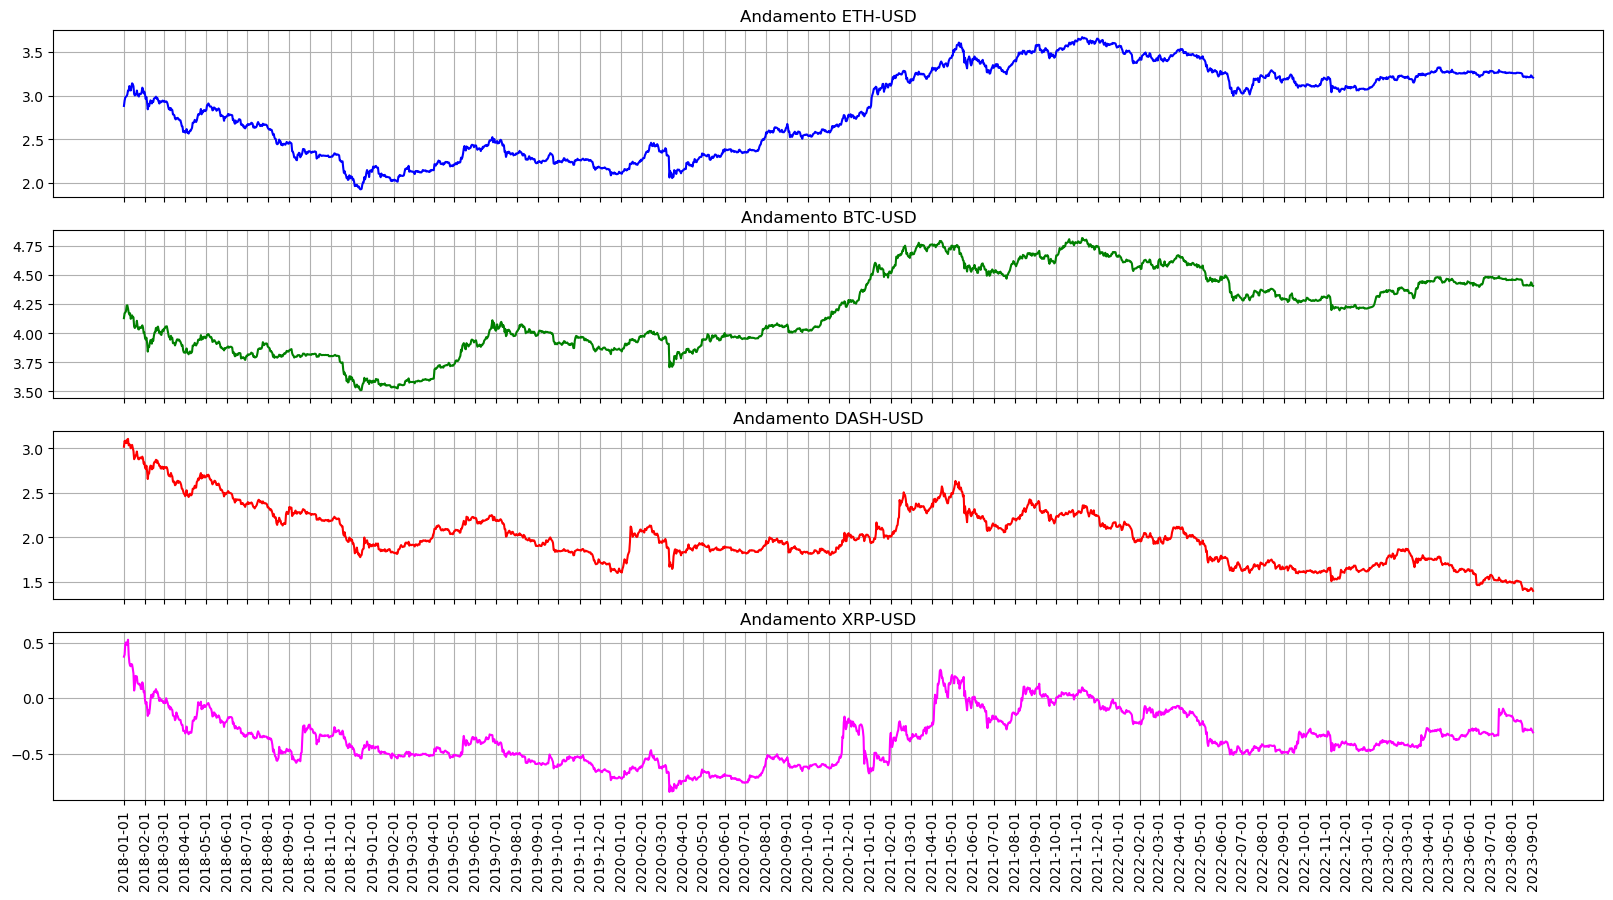

<Figure size 640x480 with 0 Axes>

In [ ]:
colors = ["blue", "green", "red", "fuchsia"]
figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0 
for crypto in cryptoList :
    axs[i].plot(cryptoDataFrameDict[crypto]["LogClosePrice"], color = colors[i % len(colors)])
    axs[i].set_title("Andamento " + crypto)
    axs[i].grid(True)
    i += 1

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()

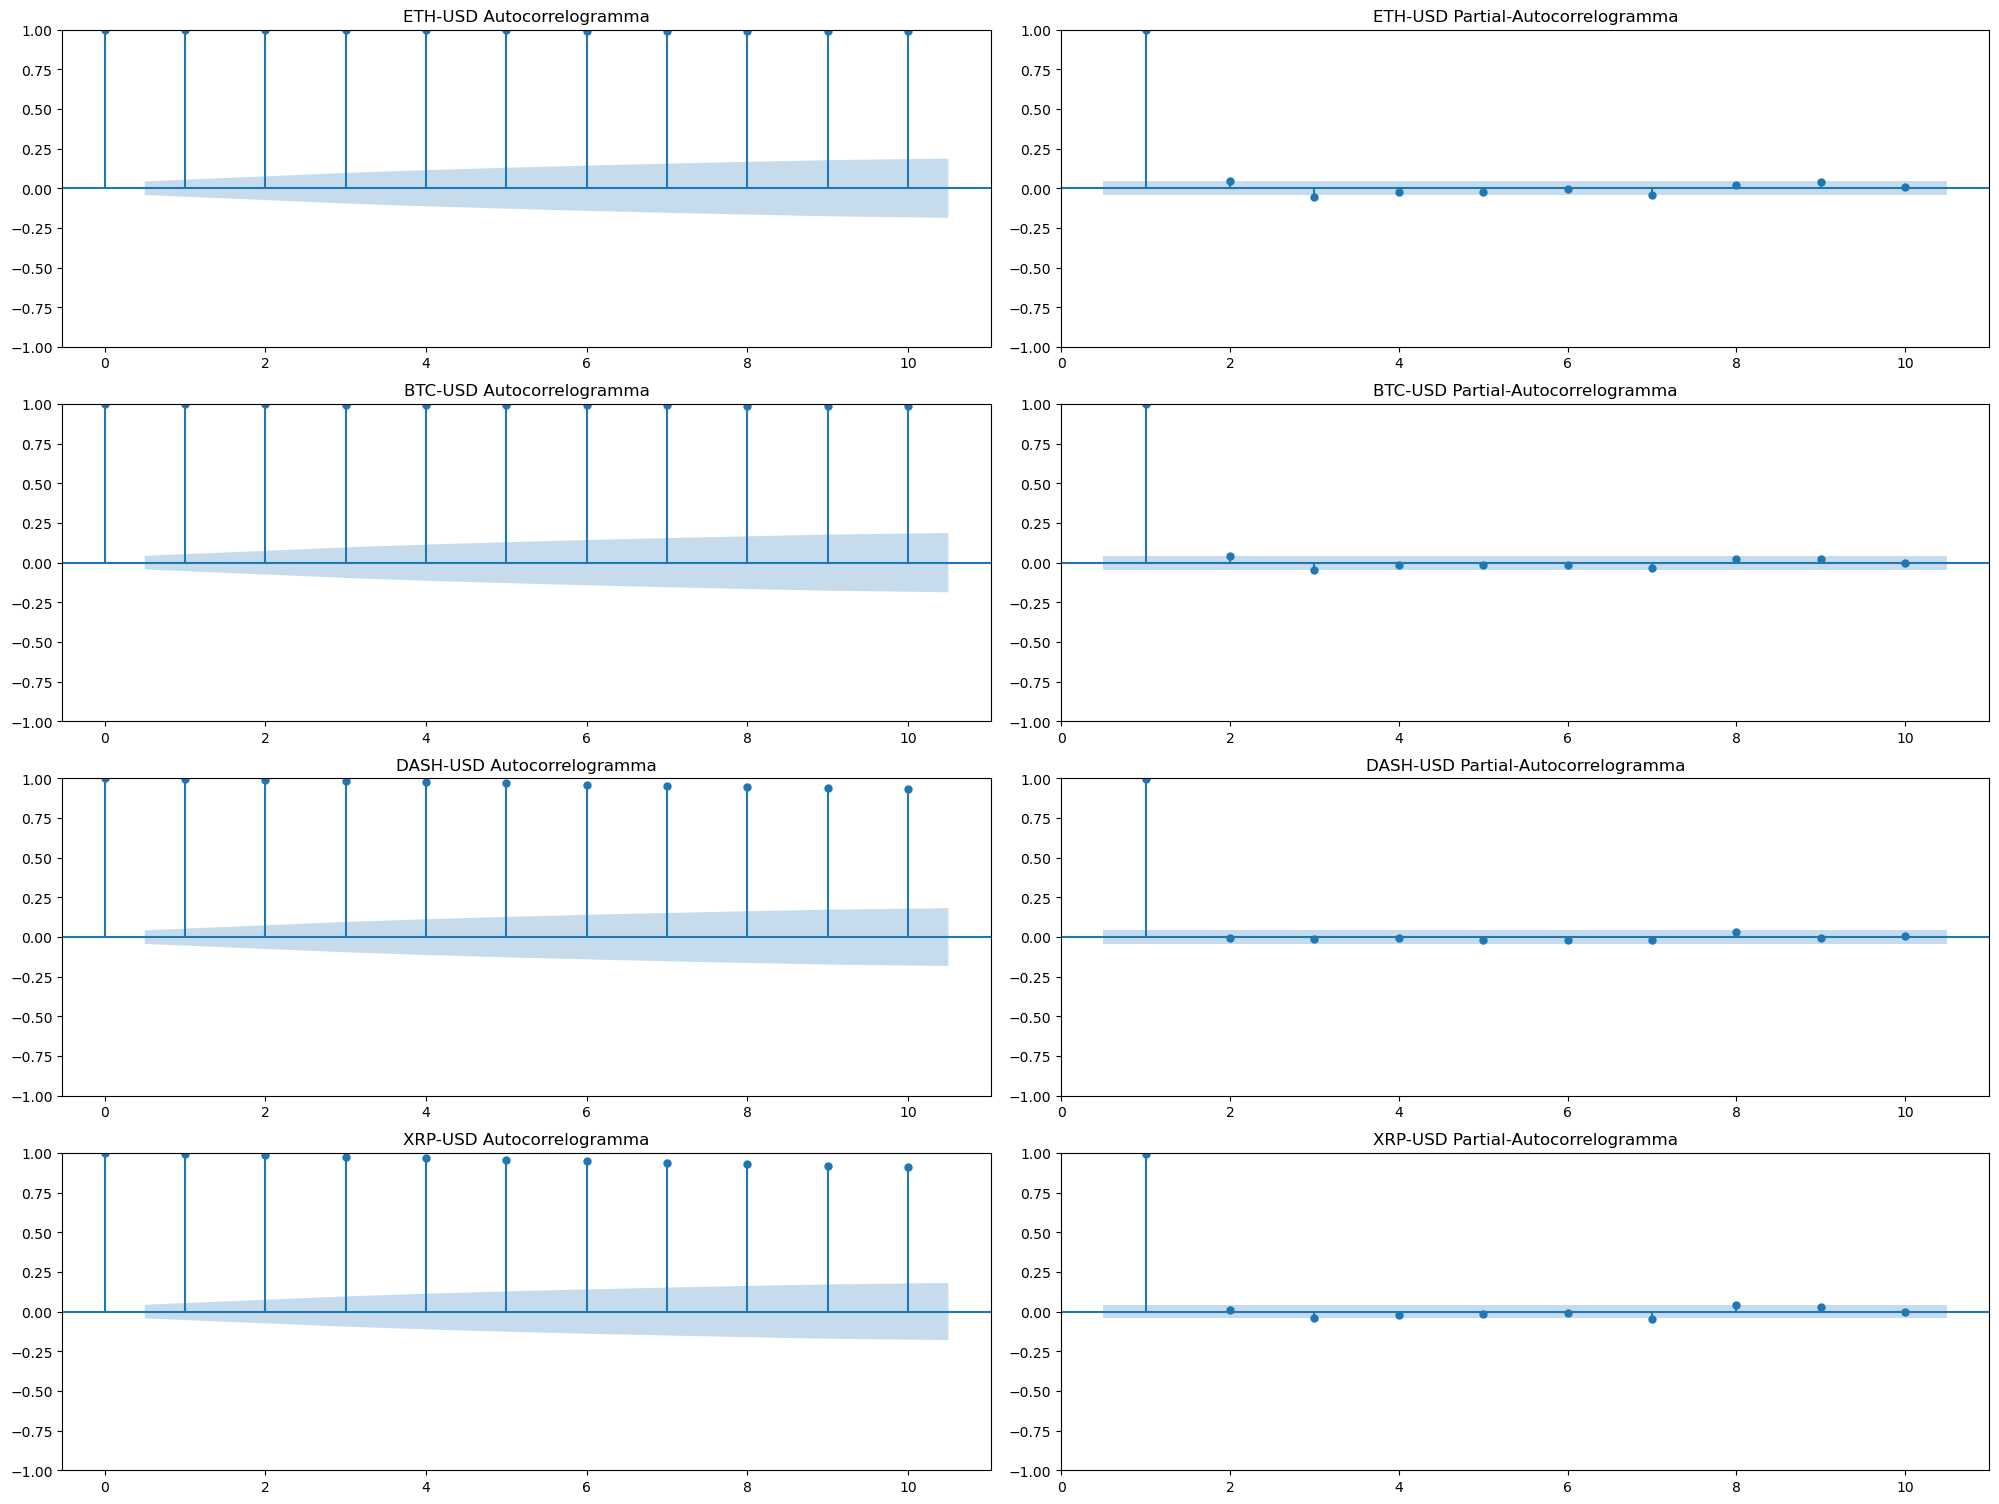

<Figure size 640x480 with 0 Axes>

In [ ]:
correlograms(cryptoDataFrameDict, "LogClosePrice", cryptoList, "Autocorrelogramma", "Partial-Autocorrelogramma", zeroPar = False)

### 2_2. Ricerca di una componenti di Random Walk
Le componenti di Random Walk vengono ricercate usando due Test di Ipotesi:
* ADF
* KPSS

Nel test di KPSS abbiamo:
* $H_0$ : La serie è stazionaria attorno a una tendenza deterministica (NON ha componente di Random Walk)
* $H_1$ : La serie non è stazionaria (HA componente di Random Walk)

Nel test di ADF abbiamo:
* $H_0$ : La serie ha una radice unitaria (HA componente di Random Walk)
* $H_1$ : La serie non ha una radice unitaria (NON ha componente di Random Walk)

Nel nostro caso vogliamo:
* KPSS, **Rigettare**
* ADF, **Accettare**

In [ ]:
kpss_test(cryptoDataFrameDict, "LogClosePrice", cryptoList)
adf_test(cryptoDataFrameDict, "LogClosePrice", cryptoList)

## TODO print(result)
## Conclusione: Trend stocastico presente ma abbastanza debole (per l'ultimo)

                        KPSS                        
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  4.630432272815153 │   0.01 │ Reject  │
│ BTC-USD  │  4.820559865672976 │   0.01 │ Reject  │
│ DASH-USD │ 2.7531299544913352 │   0.01 │ Reject  │
│ XRP-USD  │  0.918683154822733 │   0.01 │ Reject  │
└──────────┴────────────────────┴────────┴─────────┘

                                ADF                                
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -0.9501313424178288 │   0.7710157360162664 │ Accept  │
│ BTC-USD  │  -0.978510604401754 │   0.7610211585021541 │ Accept  │
│ DASH-USD │ -2.8180938650045064 │   0.0557353087206187 │ Accept  │
│ XRP-USD  │  -3.500868599705032 │ 0.007964814582617451 │ Reject  │
└──────────┴─────────────────────┴──────────────────────┴─────────┘

### 2_3. Differencing della serie storica e analisi del rumore
Procediamo lo studio con l'analisi del rumore.

Passiamo al differencing della serie storica, ottenendo $Y_{t+1} - Y_{t} = W_{t}$ e procedendo con un'analisi del termine $W_{t}$.

Il differencing viene fatto sul risultato del passaggio al logaritmo dei valori originari. Siano:
* *Y*, valori logaritmici
* *P*, valori originari
* *R*, rendimento

Fare il differencing dei valori logaritmici ci permette di fare quanto segue:

$Y_{t+1} - Y_{t} = \log(P_{t+1}) - \log(P_t) = \log(\frac{P_{t+1}}{P_{t}}) = \log(R) = W_t$

Ovvero analizzare se il rendimento ha o meno natura di rumore bianco

In [ ]:
differencingDict : dict[str, pd.DataFrame] = {}
for crypto in cryptoDataFrameDict :
    logPriceSeries : pd.Series = cryptoDataFrameDict[crypto]["LogClosePrice"]
    differencing : pd.Series = logPriceSeries.diff()
    differencing.dropna(inplace = True)
    differencing.reset_index(inplace = True, drop = True)
    differencingDict[crypto] = pd.DataFrame({"Diff" : differencing.values, "QuadDiff" : (differencing.pow(2)).values})

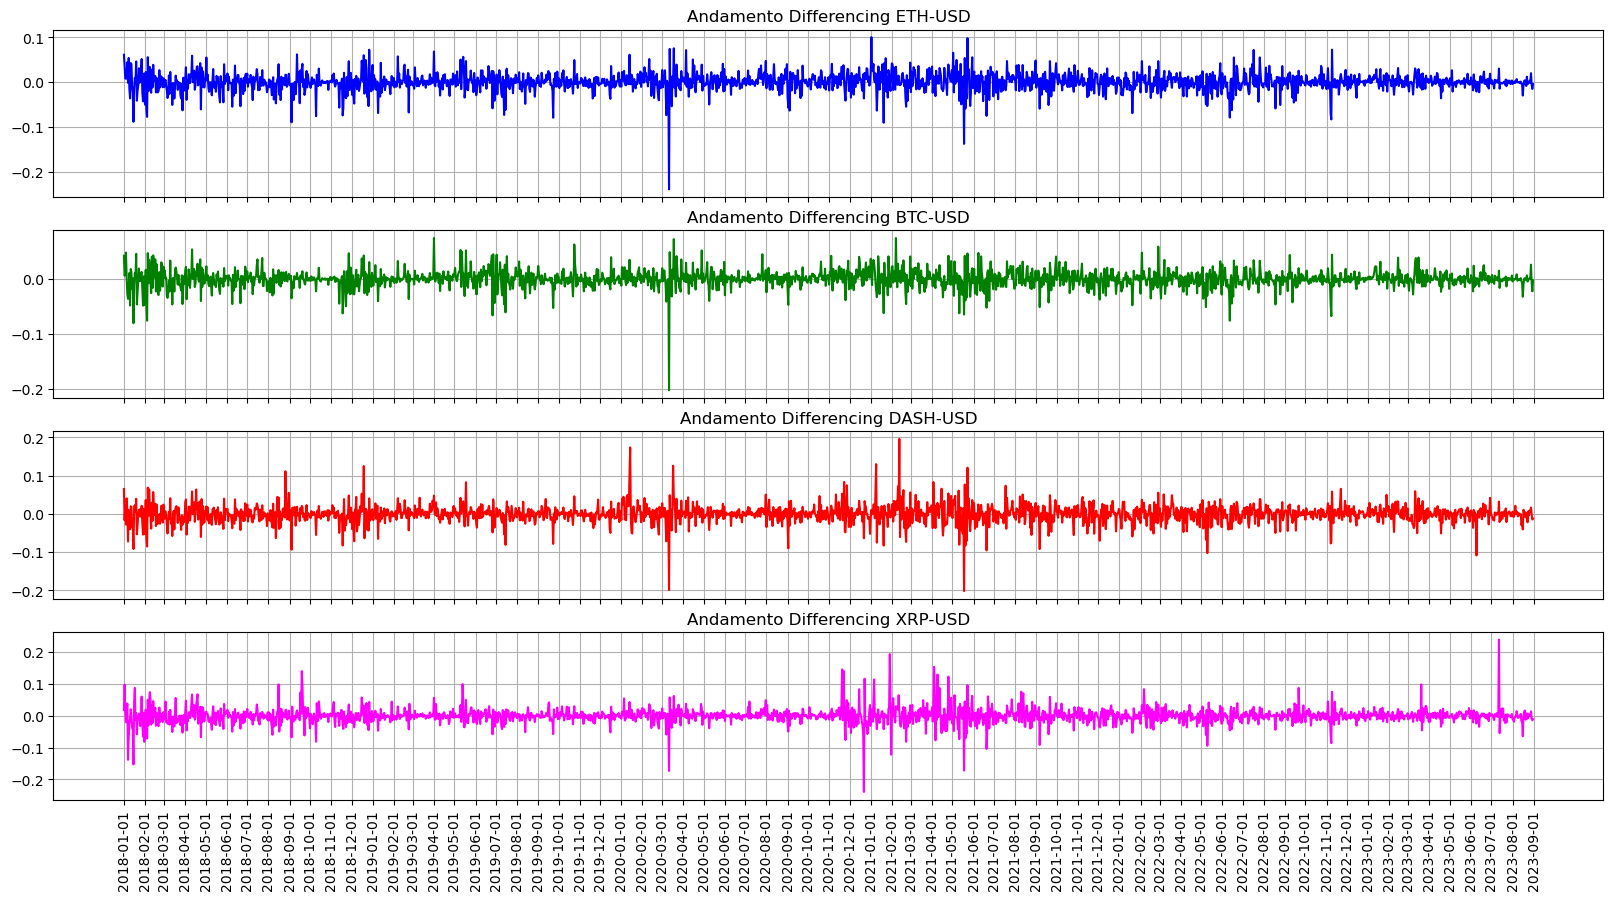

<Figure size 640x480 with 0 Axes>

In [ ]:
figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0 
for crypto in cryptoList :
    axs[i].plot(differencingDict[crypto]["Diff"], color = colors[i % len(colors)])
    axs[i].set_title("Andamento Differencing " + crypto)
    axs[i].grid(True)
    i += 1

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()

#### 2_3_1. Analisi Stazionarietà
Per l'analisi di stazionarietà eseguiamo due test:
* KDSS
* Adfuller

Nel test di KPSS abbiamo:
* *H0* : La serie è stazionaria attorno a una tendenza deterministica
* *H1* : La serie non è stazionaria

Nel test di Adfuller abbiamo:
* *H0* : La serie ha una radice unitaria
* *H1* : La serie non ha una radice unitaria

Nel nostro caso vogliamo:
* KPSS, **Accettare**
* Adfuller, **Rigettare**

In [ ]:
kpss_test(differencingDict, "Diff", cryptoList)
adf_test(differencingDict, "Diff", cryptoList)

                        KPSS                         
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.23201574524870314 │    0.1 │ Accept  │
│ BTC-USD  │ 0.15674142996559834 │    0.1 │ Accept  │
│ DASH-USD │ 0.13769918829263092 │    0.1 │ Accept  │
│ XRP-USD  │ 0.19808342863898767 │    0.1 │ Accept  │
└──────────┴─────────────────────┴────────┴─────────┘

                                 ADF                                 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -13.748813873133498 │ 1.0600349812346284e-25 │ Reject  │
│ BTC-USD  │ -31.470467916876196 │                    0.0 │ Reject  │
│ DASH-USD │ -21.645263875919735 │                    0.0 │ Reject  │
│ XRP-USD  │  -46.79501030099321 │                    0.0 │ Reject  │
└──────────┴─────────────────────┴────────────────────────┴─────────┘

Dal test di KPSS e dal test ADF, possiamo concludere che il differencing $W_t$ è stazionario

#### 2_3_2. Analisi Eteroschedasticità
Per l'analisi di eteroschedasticità eseguiamo i seguenti test:
* Breusch-Pagan
* White

Nel test di Breusch-Pagan abbiamo:
* $H_0$: I residui sono distribuiti con varianza omogenea (La serie è Omoschedastica)
* $H_1$: I residui *NON* sono distribuiti con varianza omogenea (La serie *NON* è omoschedastica)

Nel test di White abbiamo:
* $H_0$: La varianza dei residui è costante (La serie è Omoschedastica)
* $H_1$: La varianza dei residui *NON* è costante (La serie *NON* è Omoschedastica)

In questo caso vogliamo:
* Breusch-Pagan, **Accettare**
* White, **Accettare**

In [ ]:
breusch_pagan_test(differencingDict, "Diff", cryptoList, printSummary = True)
white_test(differencingDict, "Diff", cryptoList)

ETH-USD
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5481
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.459
Time:                        11:42:50   Log-Likelihood:                 5049.8
No. Observations:                2069   AIC:                        -1.010e+04
Df Residuals:                    2067   BIC:                        -1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.472      0.637      -0.002       0.001
x1          5.746e-07   7.76e-07      0.740      0.459   -9.47e-07     2.1e-06
==============================================================================
Omnibus:                      632.947   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10358.413
Skew:                          -0.995   Prob(JB):                         0.00
Kurtosis:                      13.779   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

BTC-USD
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1443
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.704
Time:                        11:42:50   Log-Likelihood:                 5578.7
No. Observations:                2069   AIC:                        -1.115e+04
Df Residuals:                    2067   BIC:                        -1.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.143      0.887      -0.002       0.001
x1          2.283e-07   6.01e-07      0.380      0.704    -9.5e-07    1.41e-06
==============================================================================
Omnibus:                      697.962   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16730.990
Skew:                          -1.029   Prob(JB):                         0.00
Kurtosis:                      16.778   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

DASH-USD
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3637
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.547
Time:                        11:42:50   Log-Likelihood:                 4747.7
No. Observations:                2069   AIC:                            -9491.
Df Residuals:                    2067   BIC:                            -9480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.252      0.211      -0.003       0.001
x1          5.417e-07   8.98e-07      0.603      0.547   -1.22e-06     2.3e-06
==============================================================================
Omnibus:                      376.450   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8823.543
Skew:                          -0.083   Prob(JB):                         0.00
Kurtosis:                      13.116   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

XRP-USD
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.386
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.239
Time:                        11:42:50   Log-Likelihood:                 4673.8
No. Observations:                2069   AIC:                            -9344.
Df Residuals:                    2067   BIC:                            -9332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.001     -1.315      0.189      -0.004       0.001
x1          1.096e-06   9.31e-07      1.177      0.239    -7.3e-07    2.92e-06
==============================================================================
Omnibus:                      510.216   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22254.586
Skew:                           0.337   Prob(JB):                         0.00
Kurtosis:                      19.053   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

                           Breusch-Pagan                           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  8.567367566736669 │ 0.0034597918568196914 │ Reject  │
│ BTC-USD  │  7.763759935805086 │  0.005379165131515243 │ Reject  │
│ DASH-USD │  2.276765009171112 │    0.1314783730532143 │ Accept  │
│ XRP-USD  │ 1.2467607341644058 │    0.2643018406639988 │ Accept  │
└──────────┴────────────────────┴───────────────────────┴─────────┘

                              White                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │   5.26508181913567 │ 0.005238555530471663 │ Reject  │
│ BTC-USD  │  4.141400487811925 │ 0.016032762971599328 │ Reject  │
│ DASH-USD │  3.666072606577798 │ 0.025743255972081297 │ Reject  │
│ XRP-USD  │ 0.7598677076192619 │   0.4678589731665155 │ Accept  │
└──────────┴────────────────────┴──────────────────────┴─────────┘

#### 2_3_3. Analisi Autocorrelazione

Per l'Autocorrelazione consideriamo i seguenti test:
* Ljung-Box

Per il test Ljung-Box:
* $H_0$: Non c'è autocorrelazione nei dati. In altre parole, i residui sono indipendenti l'uno dall'altro e non mostrano alcuna struttura di autocorrelazione significativa.
* $H_1$: I residui non sono indipendenti e mostrano una struttura di autocorrelazione significativa.

Vogliamo quindi :
* Ljung-Box, **Accettare**

In [ ]:
ljung_box_test(differencingDict, "Diff", cryptoList)

                             Ljung-Box                             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 31.609722534078987 │ 0.0004650065716092994 │ Reject  │
│ BTC-USD  │ 16.925034452734113 │   0.07603932218108504 │ Accept  │
│ DASH-USD │ 15.716773963771859 │   0.10803220218423684 │ Accept  │
│ XRP-USD  │  7.977674132723926 │     0.631017790629593 │ Accept  │
└──────────┴────────────────────┴───────────────────────┴─────────┘

Tracciamo gli autocorrelogrammi e gli autocorrelogrammi parziali dei dati.

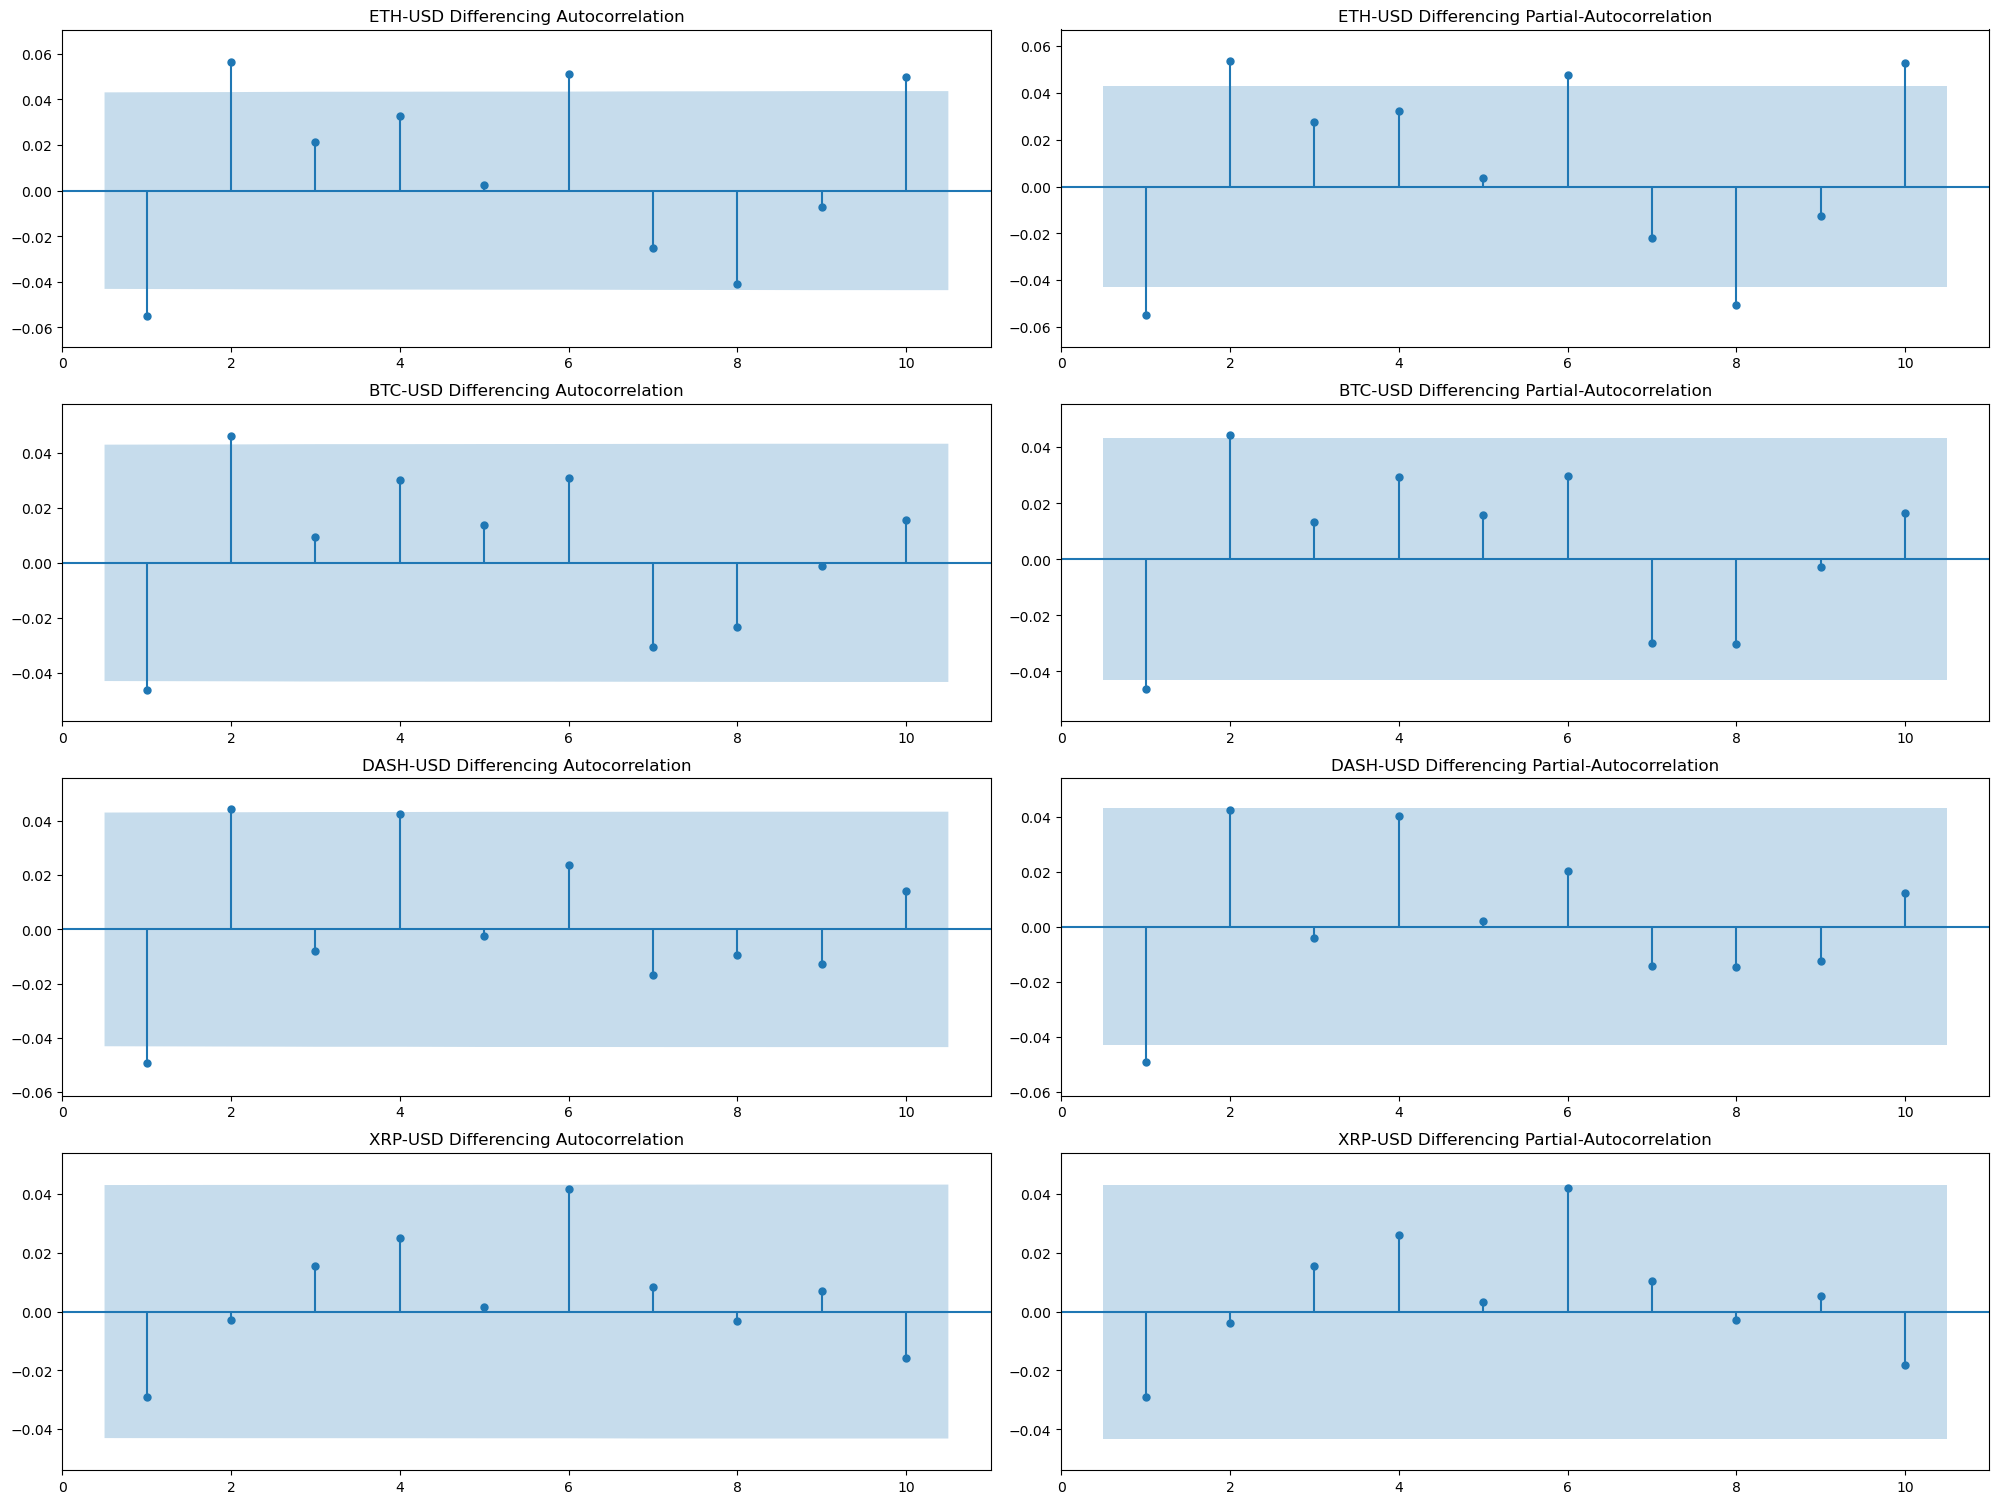

<Figure size 640x480 with 0 Axes>

In [ ]:
correlograms(differencingDict, "Diff", cryptoList, titleAuto = "Differencing Autocorrelation", titlePartial = "Differencing Partial-Autocorrelation", zeroAuto = False, yLimsAuto = True, zeroPar = False, yLimsPar = True)

Il test quindi Accetta per entrambi i casi e i dati non dovrebbero essere autocorrelati.
Tuttavia, osservando i grafici relativi al differencing, possiamo notare come vi siano dei cluster di varianza costante, in cui a basse varianze seguono zone di bassa varianza (analogamente per quelle ad alta varianza).

Riassumendo abbiamo:
* Accettazione del test di Ljung-Box
* Presenza di clusterizzazione delle varianze
Questo fenomeno potrebbe essere dovuto al fatto che i dati sono molti, e quindi il grande numero di dati potrebbe offuscare l'autocorrelazione portando i dati a tendere al gaussiano.

Ci fa supporre la presenza di punti di rottura nella struttura. 

Passiamo quindi, dopo dei veloci test sulla gaussianità, all'analisi delle rotture strutturali.

#### 2_3_4. Analisi Normalità
Per l'analisi di normalità eseguiamo i seguenti test:
* Shapiro-Wilk
* Kolmogorov-Smirnov

Nel test di Shapiro-Wilk abbiamo:
* $H_0$: I dati seguono una distribuzione normale
* $H_1$: I dati NON seguono una distribuzione normale

Nel test di Kolmogorov-Smirnov abbiamo:
* $H_0$: I dati seguono la distribuzione specificata
* $H_1$: I dati NON seguono la distribuzione specificata

Nel nostro caso vogliamo:
* Shapiro-Wilk, **Accettare**
* Kolmogorov-Smirnov, **Accettare**

In [ ]:
shapiro_wilk(differencingDict, "Diff", cryptoList)
kolmogorov_smirnov(differencingDict, "Diff", cryptoList)

                            Shapiro-Wilk                            
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.9225029349327087 │  2.243272511905845e-31 │ Reject  │
│ BTC-USD  │ 0.9065624475479126 │  7.687562699532387e-34 │ Reject  │
│ DASH-USD │ 0.9040272235870361 │ 3.3494620980164206e-34 │ Reject  │
│ XRP-USD  │ 0.8357081413269043 │   7.15923385423549e-42 │ Reject  │
└──────────┴────────────────────┴────────────────────────┴─────────┘

                 Kolmogorov-Smirnov                  
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  0.4705378122861261 │    0.0 │ Reject  │
│ BTC-USD  │ 0.47608764853183083 │    0.0 │ Reject  │
│ DASH-USD │ 0.46608875744466827 │    0.0 │ Reject  │
│ XRP-USD  │  0.4642030732172747 │    0.0 │ Reject  │
└──────────┴─────────────────────┴────────┴─────────┘

Notiamo quindi che i due test ci fanno rigettare in entrambi i casi l'ipotesi nulla di normalità dei dati.
Per completezza tracciamo un grafico dei dati.

### 2_4. Analisi dei Punti di Rottura nella Struttura
Cerchiamo i punti di rottura usando la funzione *breakpoints* del package *strucchange* di R.

In [ ]:
# Loading the function we have defined in R.
r['source']('./R/R_Scripts.R')

breakPointSearch_R = robjects.globalenv['breakPointSearch']
fstatBreakpointsSearch_R = robjects.globalenv['fstatBreakpointsSearch']
supmzBreakpointsSearch_R = robjects.globalenv['supmzBreakpointsSearch']

cryptoBreakPointsDict_1 = {}
cryptoBreakPointsDict_2 = {}
cryptoBreakPointsDict_3 = {}

for crypto in cryptoList :
    ## Converting to R dataFrame
    closePrice_R = pandas2ri.py2rpy(cryptoDataFrameDict[crypto]["LogClosePrice"])

    # Invoking R function
    breakPointsList_R = breakPointSearch_R(closePrice_R)

    #Converting it back to a pandas dataframe.
    breakPointsList = np.array(breakPointsList_R)

    breakPointsList = [int(elem - 1) for elem in breakPointsList]
    cryptoBreakPointsDict_1[crypto] = breakPointsList

    fstatPointsList_R = fstatBreakpointsSearch_R(closePrice_R)
    fstatBreakPointsList = np.array(fstatPointsList_R)
    fstatBreakPointsList = [int(elem - 1) for elem in fstatBreakPointsList]
    cryptoBreakPointsDict_2[crypto] = fstatBreakPointsList

    logClosePriceDataFrame = pd.DataFrame(cryptoDataFrameDict[crypto]["LogClosePrice"], columns = ["LogClosePrice"])
    logClosePriceDF_R = pandas2ri.py2rpy(logClosePriceDataFrame)
    supmzPointsList_R = supmzBreakpointsSearch_R(logClosePriceDF_R)
    supmzBreakPointsList = list(supmzPointsList_R)
    cryptoBreakPointsDict_3[crypto] = supmzBreakPointsList

In [ ]:
breakPointsTable = buildTable("Structural Breakpoints", ["Crypto", "Breakpoint", "FStats", "SupMZ"], ["left", "right", "right", "right"])
for crypto in cryptoList :
    datesString_1 = "| "
    datesString_2 = "| "
    datesString_3 = "| "
    for breakpoint in cryptoBreakPointsDict_1[crypto] :
        date = cryptoDataFrameDict[crypto]["Date"].loc[breakpoint]
        datesString_1 += date + " | "
    for breakpoint in cryptoBreakPointsDict_2[crypto] :
        date = cryptoDataFrameDict[crypto]["Date"].loc[breakpoint]
        datesString_2 += date + " | "
    for breakpoint in cryptoBreakPointsDict_3[crypto] :
        date = cryptoDataFrameDict[crypto]["Date"].loc[breakpoint]
        datesString_3 += date + " | "
    breakPointsTable.add_row(crypto, datesString_1, datesString_2, datesString_3)

console = Console()
console.print(breakPointsTable)

                                         Structural Breakpoints                                          
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃                                             Breakpoint ┃          FStats ┃           SupMZ ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │  | 2018-11-06 | 2020-02-06 | 2021-01-02 | 2022-05-10 | │  | 2020-12-29 | │  | 2021-01-04 | │
│ BTC-USD  │               | 2019-05-12 | 2020-12-15 | 2022-05-08 | │  | 2020-11-11 | │  | 2020-11-06 | │
│ DASH-USD │  | 2018-11-06 | 2019-09-22 | 2021-01-09 | 2022-05-04 | │  | 2018-11-07 | │  | 2022-05-12 | │
│ XRP-USD  │  | 2018-11-18 | 2019-09-24 | 2021-02-08 | 2022-04-28 | │  | 2021-02-08 | │  | 2021-02-05 | │
└──────────┴────────────────────────────────────────────────────────┴─────────────────┴─────────────────┘

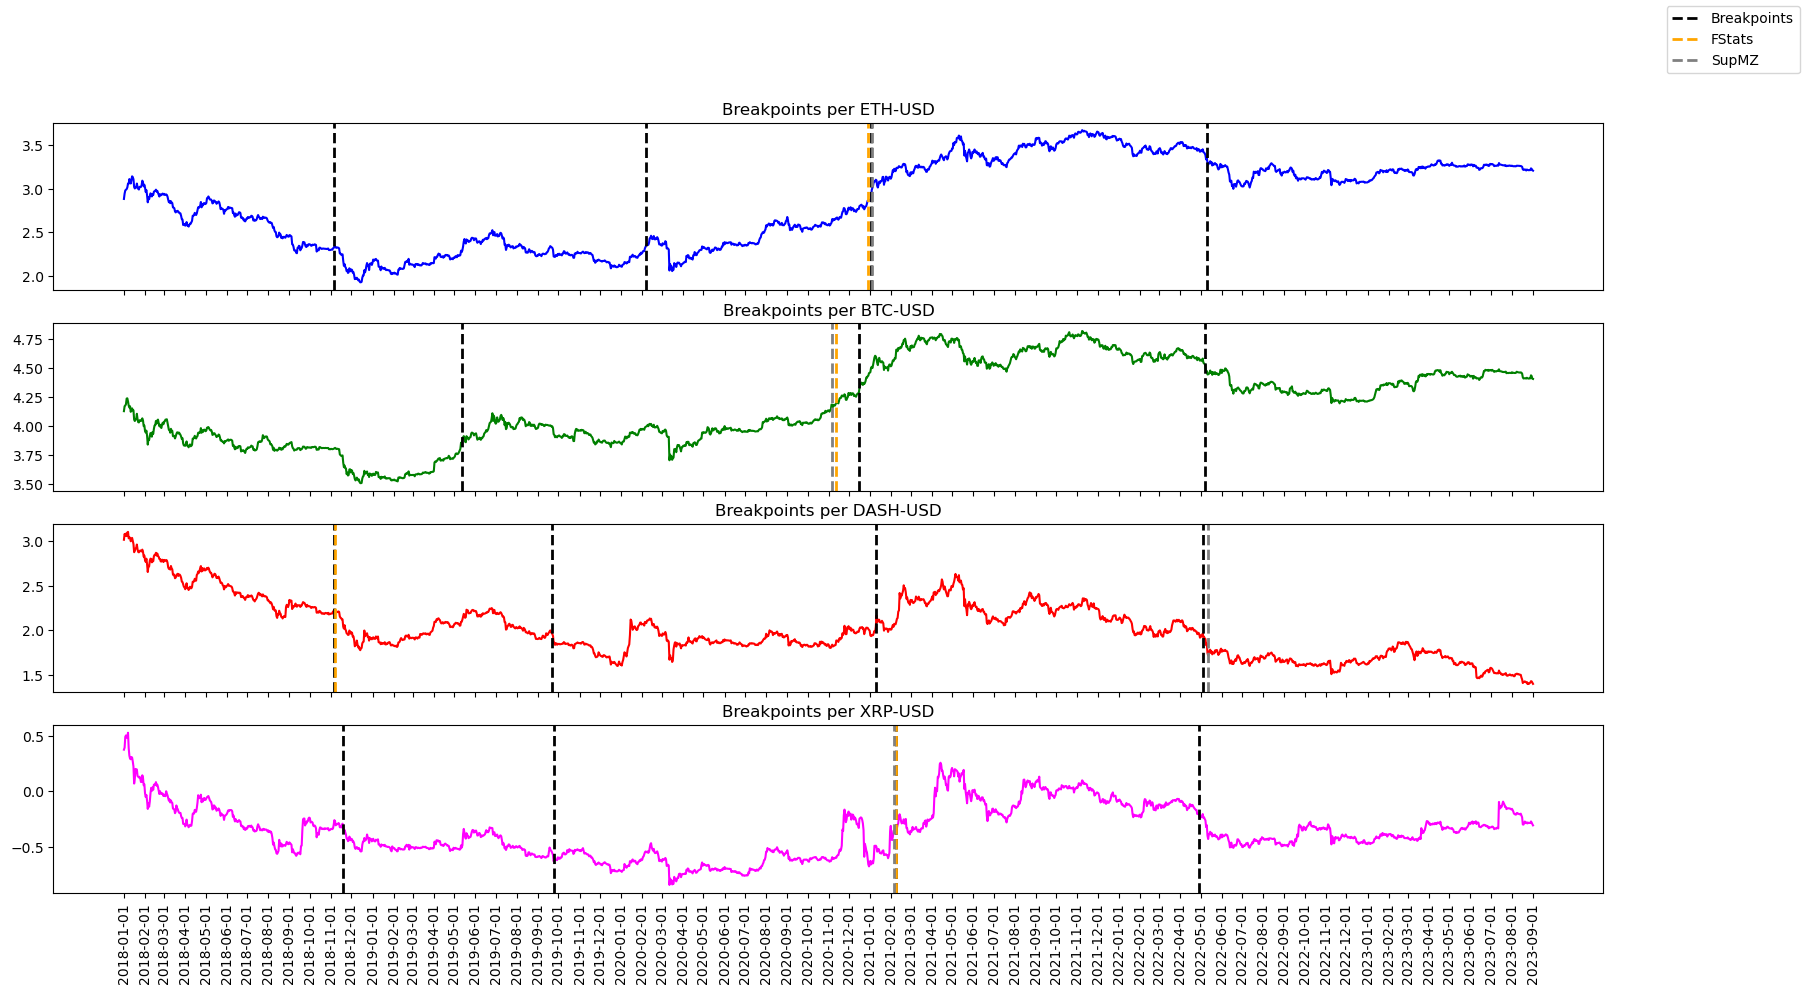

<Figure size 640x480 with 0 Axes>

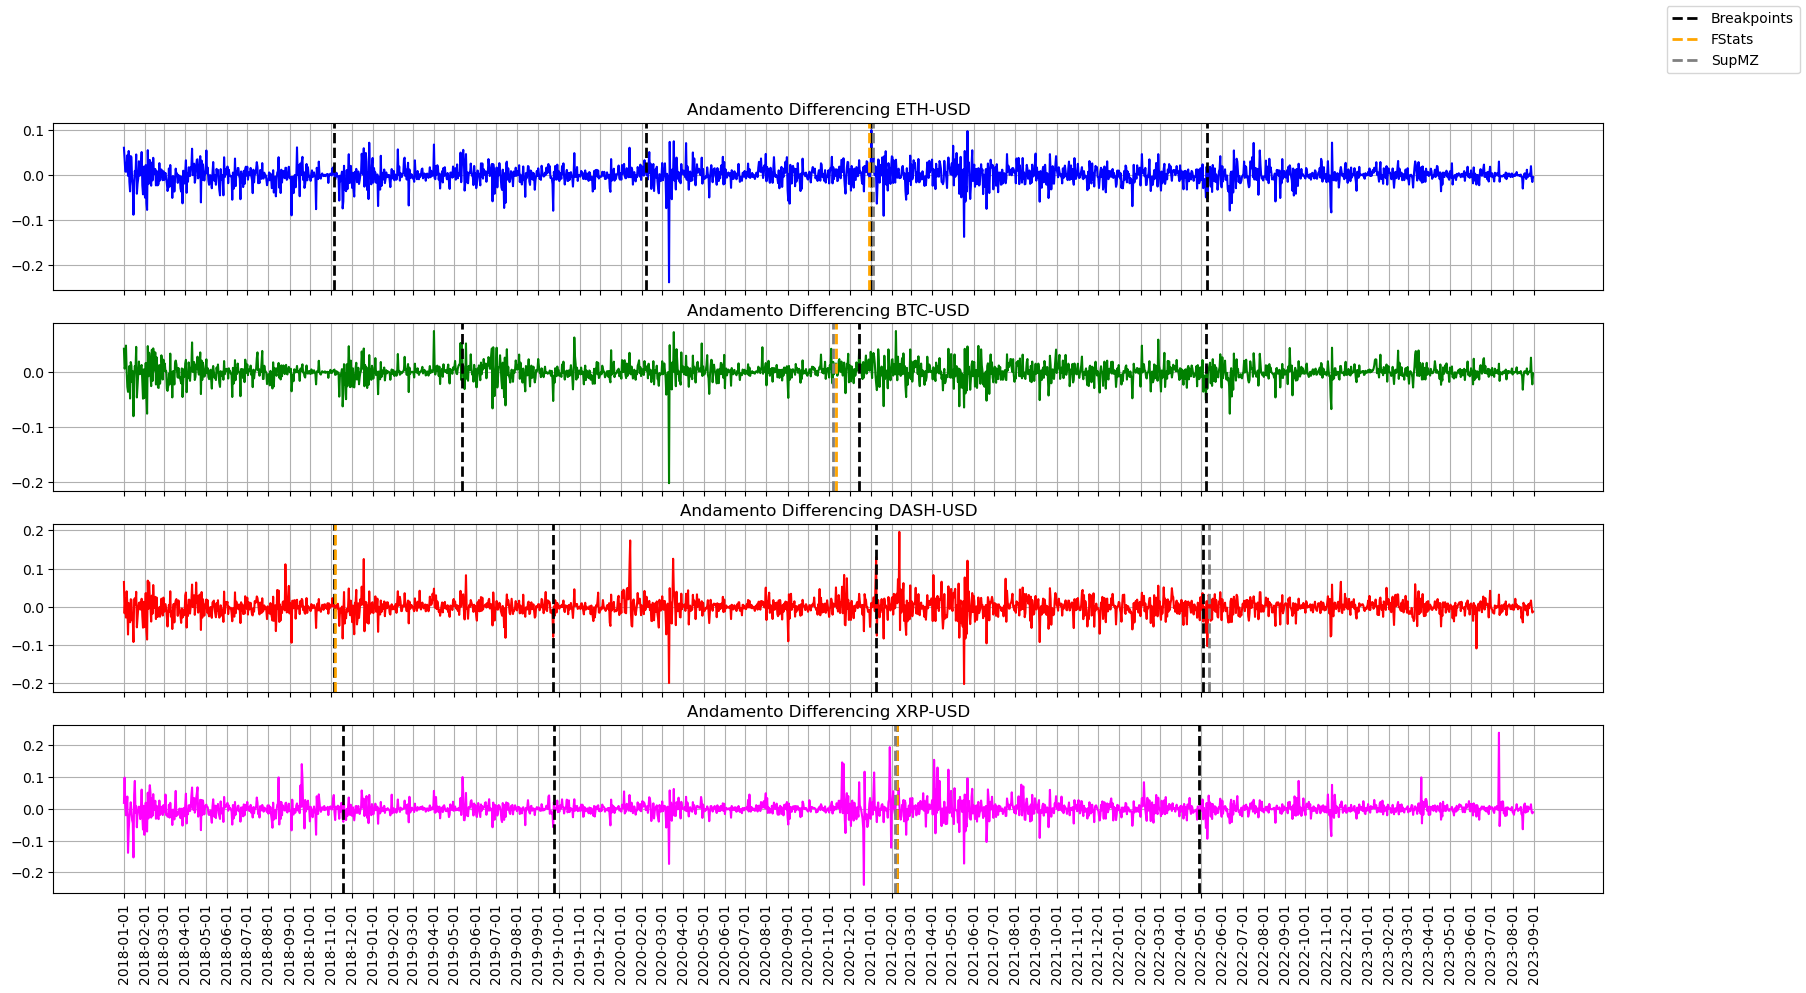

<Figure size 640x480 with 0 Axes>

In [ ]:
colors = ["blue", "green", "red", "fuchsia"]

figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0 
legend_1 = True
legend_2 = True
legend_3 = True
for crypto in cryptoList :
    axs[i].plot(cryptoDataFrameDict[crypto]["LogClosePrice"], color = colors[i % len(colors)])
    axs[i].set_title("Breakpoints per " + crypto)
    # axs[i].grid(True)

    for breakpoint in cryptoBreakPointsDict_1[crypto] :
        axs[i].axvline(x = breakpoint, color = "black", linestyle = "--", linewidth = "2", label = "Breakpoints" if legend_1 else None)
        legend_1 = False
    for breakpoint in cryptoBreakPointsDict_2[crypto] :
        axs[i].axvline(x = breakpoint, color = "orange", linestyle = "--", linewidth = "2", label = "FStats" if legend_2 else None)
        legend_2 = False
    for breakpoint in cryptoBreakPointsDict_3[crypto] :
        axs[i].axvline(x = breakpoint, color = "gray", linestyle = "--", linewidth = "2", label = "SupMZ" if legend_3 else None)
        legend_3 = False
    i += 1
figure.legend()

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()


figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0
legend_1 = True
legend_2 = True
legend_3 = True
for crypto in cryptoList :
    axs[i].plot(differencingDict[crypto]["Diff"], color = colors[i % len(colors)])
    axs[i].set_title("Andamento Differencing " + crypto)
    axs[i].grid(True)

    for breakpoint in cryptoBreakPointsDict_1[crypto] :
        axs[i].axvline(x = breakpoint, color = "black", linestyle = "--", linewidth = "2", label = "Breakpoints" if legend_1 else None)
        legend_1 = False
    for breakpoint in cryptoBreakPointsDict_2[crypto] :
        axs[i].axvline(x = breakpoint, color = "orange", linestyle = "--", linewidth = "2", label = "FStats" if legend_2 else None)
        legend_2 = False
    for breakpoint in cryptoBreakPointsDict_3[crypto] :
        axs[i].axvline(x = breakpoint, color = "gray", linestyle = "--", linewidth = "2", label = "SupMZ" if legend_3 else None)
        legend_3 = False
        
    i += 1
figure.legend()

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()

I test rilevano quindi la presenza di punti di rottura.

Notiamo in particolare che test diversi rilevano punti di rottura simili: scegliamo quindi di procedere con un "voto a maggioranza", prendendo il punto di rottura più simile tra i tre test.

## 3. Divisione del dataset
Dividiamo il dataset in due parti, training e test set: manteniamo nel training circa il 90% dei dati di ogni strumento

In [ ]:
cryptoBreakPointsIndexes = {
    "ETH-USD" : cryptoBreakPointsDict_1["ETH-USD"][2],
    "BTC-USD" : cryptoBreakPointsDict_1["BTC-USD"][1],
    "DASH-USD" : cryptoBreakPointsDict_1["DASH-USD"][3],
    "XRP-USD" : cryptoBreakPointsDict_1["XRP-USD"][2],
}

In [ ]:
restrCryptoDataFrameDict : dict[str, pd.DataFrame] = {}
restrDiffDataFrameDict : dict[str, pd.DataFrame] = {}

for crypto in cryptoList :
    breakPoint = cryptoBreakPointsIndexes[crypto]

    restrictedDataFrame : pd.DataFrame = cryptoDataFrameDict[crypto].iloc[cryptoDataFrameDict[crypto].index >= breakPoint]
    restrictedDataFrame.reset_index(drop = True, inplace = True)
    restrCryptoDataFrameDict[crypto] = restrictedDataFrame

    restrictedDiffDataFrame : pd.DataFrame = differencingDict[crypto].iloc[differencingDict[crypto]["Diff"].index >= breakPoint]
    restrictedDiffDataFrame.reset_index(drop = True, inplace = True)
    restrDiffDataFrameDict[crypto] = restrictedDiffDataFrame

In [ ]:
trainCryptoDict : dict[str, pd.DataFrame] = {}
testCryptoDict : dict[str, pd.DataFrame] = {}
trainCryptoDiffDict : dict[str, pd.DataFrame] = {}
testCryptoDiffDict : dict[str, pd.DataFrame] = {}

for crypto in cryptoList :
    totalSize = restrCryptoDataFrameDict[crypto].shape[0]
    trainSize = int((totalSize / 100) * 90)
    testSize = totalSize - trainSize

    trainCryptoDict[crypto] = restrCryptoDataFrameDict[crypto].iloc[restrCryptoDataFrameDict[crypto].index < trainSize]
    trainCryptoDict[crypto].reset_index(drop = True, inplace = True)
    testCryptoDict[crypto] = restrCryptoDataFrameDict[crypto].iloc[restrCryptoDataFrameDict[crypto].index >= trainSize]
    testCryptoDict[crypto].reset_index(drop = True, inplace = True)

    trainCryptoDiffDict[crypto] = restrDiffDataFrameDict[crypto].iloc[restrDiffDataFrameDict[crypto].index < trainSize]
    trainCryptoDiffDict[crypto].reset_index(drop = True, inplace = True)
    testCryptoDiffDict[crypto] = restrDiffDataFrameDict[crypto].iloc[restrDiffDataFrameDict[crypto].index >= trainSize]
    testCryptoDiffDict[crypto].reset_index(drop = True, inplace = True)

## 4. Analisi dei dati ristretti

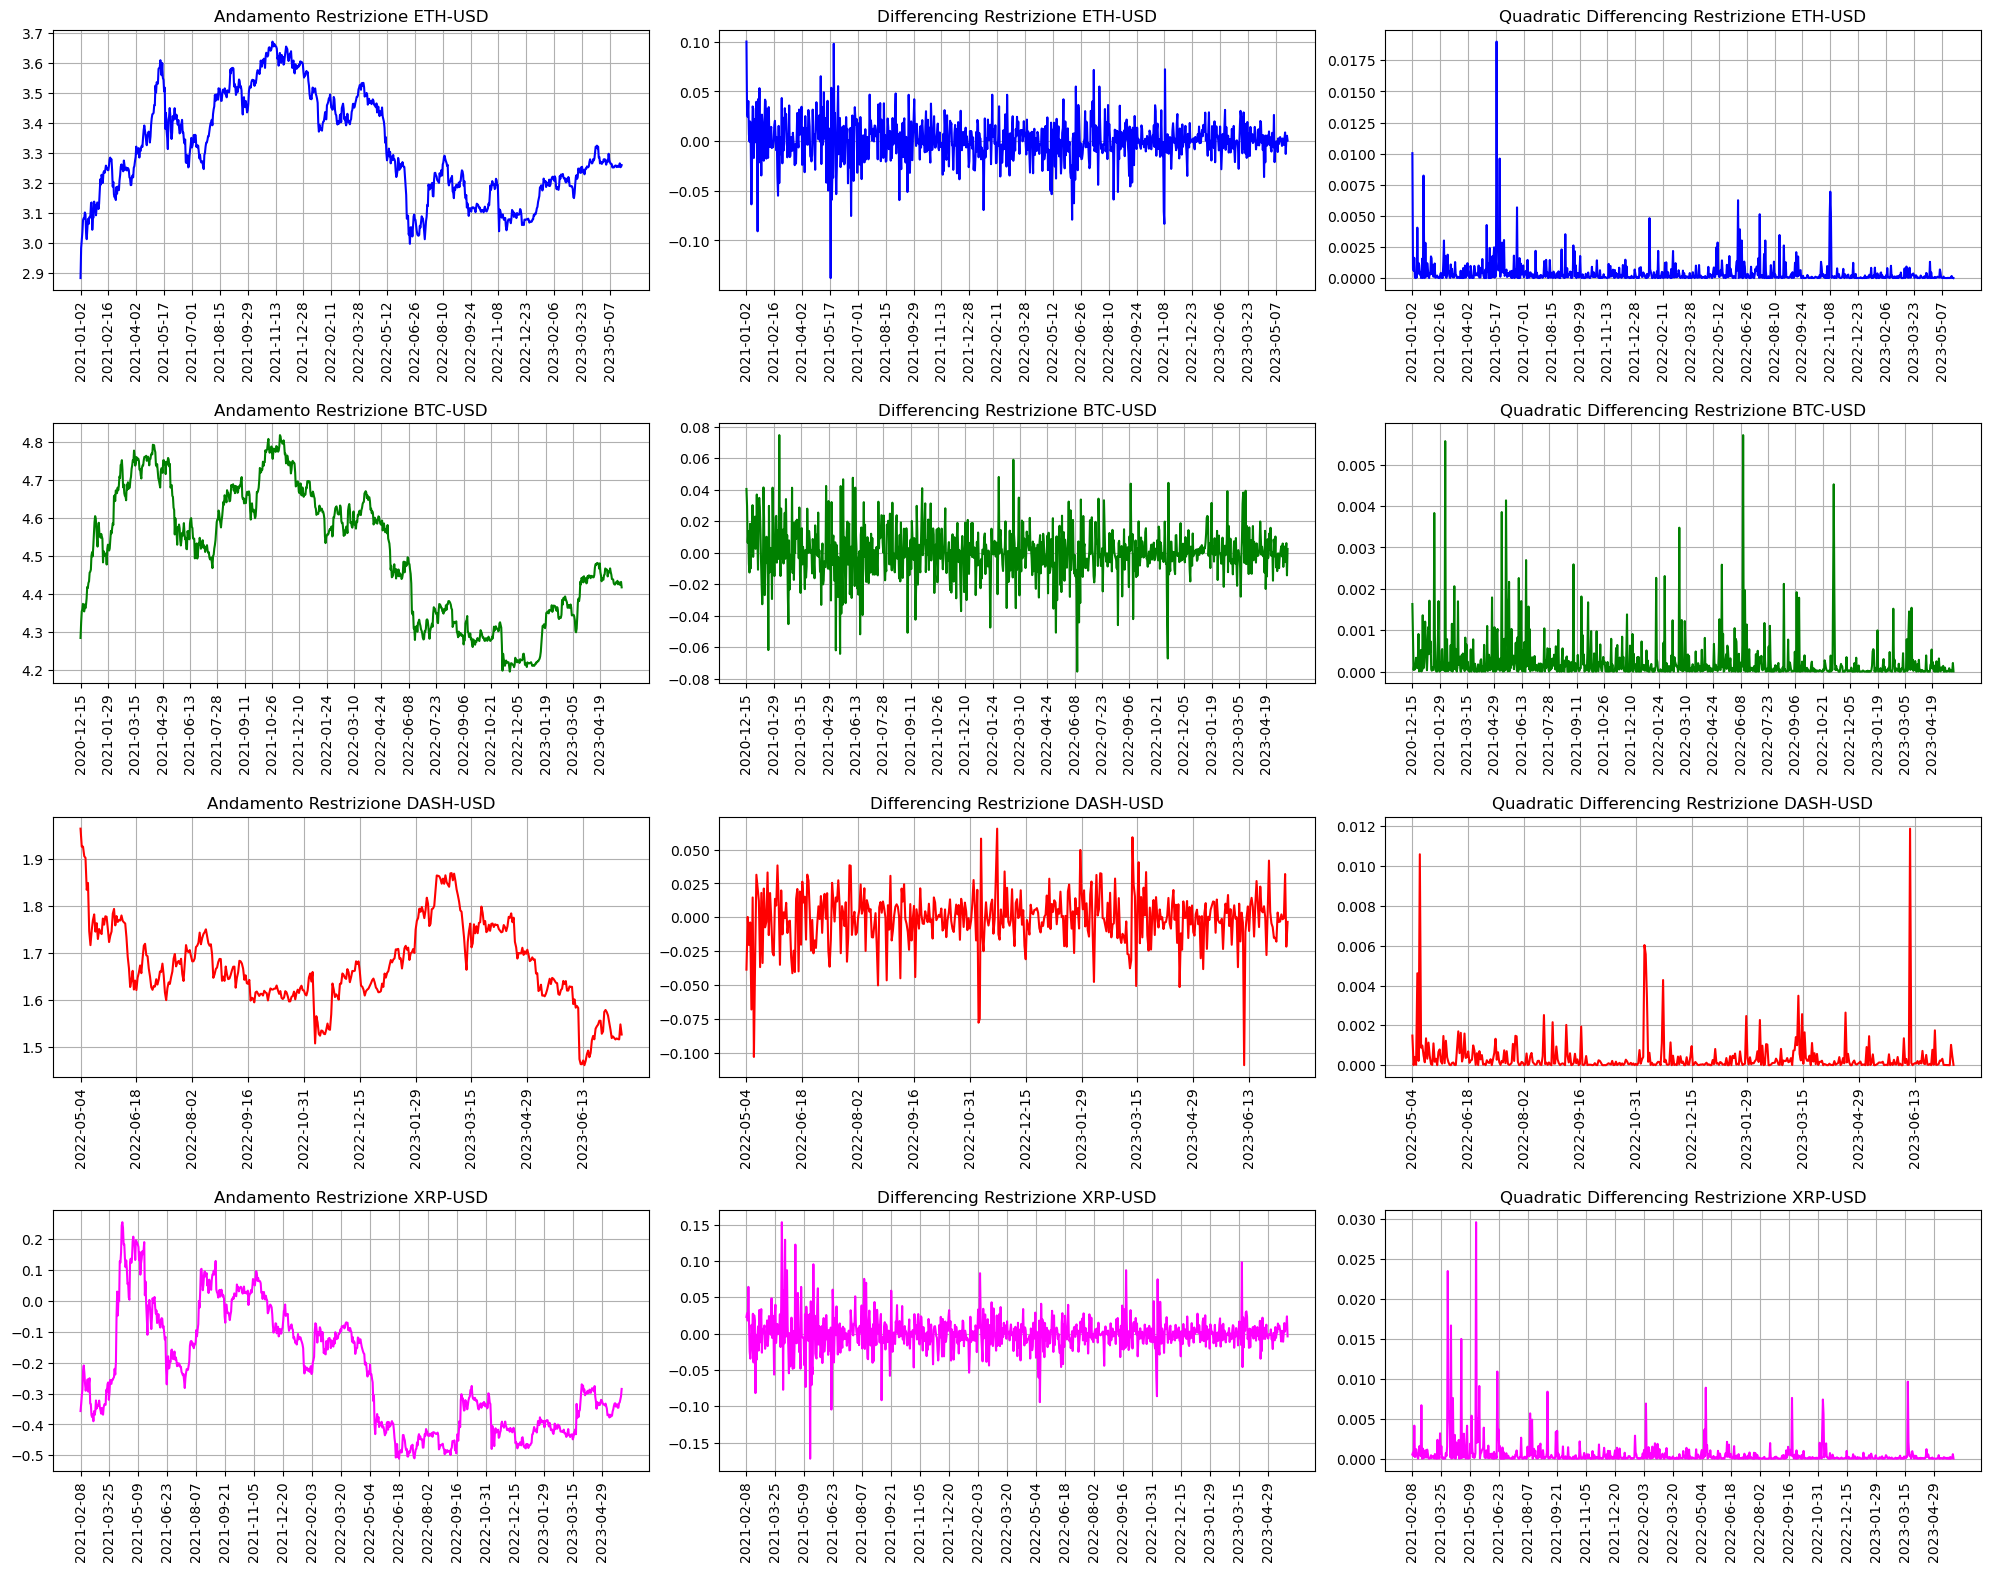

<Figure size 640x480 with 0 Axes>

In [ ]:
colors = ["blue", "green", "red", "fuchsia"]
figure, axs = plt.subplots(nrows = len(cryptoList), ncols = 3, figsize = (20,15))
figure.tight_layout(h_pad = 7.5, w_pad = 2)

STEP = 45
ROTATION = 90

i = 0 
for crypto in cryptoList :
    axs[i][0].plot(trainCryptoDict[crypto]["LogClosePrice"], color = colors[i % len(colors)])
    axs[i][0].set_title("Andamento Restrizione " + crypto)
    axs[i][0].grid(True)

    xtickPoints = np.arange(start = 0, stop = trainCryptoDict[crypto].shape[0], step = STEP)
    xtickLabels = trainCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[i][0].set_xticks(xtickPoints)
    axs[i][0].set_xticklabels(xtickLabels, rotation = ROTATION)

    i += 1

i = 0 
for crypto in cryptoList :
    axs[i][1].plot(trainCryptoDiffDict[crypto]["Diff"], color = colors[i % len(colors)])
    axs[i][1].set_title("Differencing Restrizione " + crypto)
    axs[i][1].grid(True)

    xtickPoints = np.arange(start = 0, stop = trainCryptoDict[crypto].shape[0], step = STEP)
    xtickLabels = trainCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[i][1].set_xticks(xtickPoints)
    axs[i][1].set_xticklabels(xtickLabels, rotation = ROTATION)

    i += 1

i = 0 
for crypto in cryptoList :
    axs[i][2].plot(trainCryptoDiffDict[crypto]["QuadDiff"], color = colors[i % len(colors)])
    axs[i][2].set_title("Quadratic Differencing Restrizione " + crypto)
    axs[i][2].grid(True)

    xtickPoints = np.arange(start = 0, stop = trainCryptoDict[crypto].shape[0], step = STEP)
    xtickLabels = trainCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[i][2].set_xticks(xtickPoints)
    axs[i][2].set_xticklabels(xtickLabels, rotation = ROTATION)

    i += 1

plt.show()
plt.clf()

#### 4_1. Analisi del differencing ridotto
Come nel primo caso analizziamo il differencing e vediamo se questo ha natura di white noise.

##### 4_1_1. Analisi Stazionarietà
Per l'analisi di stazionarietà eseguiamo due test:
* KDSS
* Adfuller

Nel test di KPSS abbiamo:
* *H0* : La serie è stazionaria attorno a una tendenza deterministica
* *H1* : La serie non è stazionaria

Nel test di Adfuller abbiamo:
* *H0* : La serie ha una radice unitaria
* *H1* : La serie non ha una radice unitaria

Nel nostro caso vogliamo:
* KPSS, **Accettare**
* Adfuller, **Rigettare**

In [ ]:
kpss_test(trainCryptoDiffDict, "Diff", cryptoList)
adf_test(trainCryptoDiffDict, "Diff", cryptoList)

                        KPSS                         
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.30402339982507376 │    0.1 │ Accept  │
│ BTC-USD  │ 0.26793706713609056 │    0.1 │ Accept  │
│ DASH-USD │ 0.14448487432870857 │    0.1 │ Accept  │
│ XRP-USD  │ 0.10857489114721602 │    0.1 │ Accept  │
└──────────┴─────────────────────┴────────┴─────────┘

                                ADF                                 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -31.463043189797844 │                   0.0 │ Reject  │
│ BTC-USD  │ -30.483765580661746 │                   0.0 │ Reject  │
│ DASH-USD │ -15.051422863190458 │ 9.281783031352217e-28 │ Reject  │
│ XRP-USD  │ -31.024464015415518 │                   0.0 │ Reject  │
└──────────┴─────────────────────┴───────────────────────┴─────────┘

##### 4_1_2. Analisi Eteroschedasticità
Per l'analisi di eteroschedasticità eseguiamo i seguenti test:
* Breusch-Pagan
* White

Nel test di Breusch-Pagan abbiamo:
* $H_0$: I residui sono distribuiti con varianza omogenea (La serie è Omoschedastica)
* $H_1$: I residui *NON* sono distribuiti con varianza omogenea (La serie *NON* è omoschedastica)

Nel test di White abbiamo:
* $H_0$: La varianza dei residui è costante (La serie è Omoschedastica)
* $H_1$: La varianza dei residui *NON* è costante (La serie *NON* è Omoschedastica)

In questo caso vogliamo:
* Breusch-Pagan, **Accettare**
* White, **Accettare**

In [ ]:
breusch_pagan_test(trainCryptoDiffDict, "Diff", cryptoList)
white_test(trainCryptoDiffDict, "Diff", cryptoList)

                           Breusch-Pagan                           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃         StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 25.05566267671057 │  6.737702332420841e-07 │ Reject  │
│ BTC-USD  │ 25.84501763683427 │ 4.5114279068198483e-07 │ Reject  │
│ DASH-USD │ 2.495168564366106 │    0.11492299248948996 │ Accept  │
│ XRP-USD  │  34.8344311264828 │  5.204886672228533e-09 │ Reject  │
└──────────┴───────────────────┴────────────────────────┴─────────┘

                              White                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃         StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  13.1651660977433 │  2.32843202022156e-06 │ Reject  │
│ BTC-USD  │ 13.22301453319326 │ 2.193663541133534e-06 │ Reject  │
│ DASH-USD │ 3.299977334208391 │  0.037811687468737934 │ Reject  │
│ XRP-USD  │ 23.00017453495107 │ 1.885248700990853e-10 │ Reject  │
└──────────┴───────────────────┴───────────────────────┴─────────┘

##### 4_1_3. Analisi Autocorrelazione
Per l'Autocorrelazione consideriamo i seguenti test:
* Ljung-Box

Per il test Ljung-Box:
* $H_0$: Non c'è autocorrelazione nei dati. In altre parole, i residui sono indipendenti l'uno dall'altro e non mostrano alcuna struttura di autocorrelazione significativa.
* $H_1$: I residui non sono indipendenti e mostrano una struttura di autocorrelazione significativa.

Vogliamo quindi :
* Ljung-Box, **Accettare**

In [ ]:
ljung_box_test(trainCryptoDiffDict, "Diff", cryptoList)

                            Ljung-Box                             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  20.74439638246904 │ 0.022948121087501706 │ Reject  │
│ BTC-USD  │ 12.632829754955273 │  0.24493117060834974 │ Accept  │
│ DASH-USD │  9.348220225953458 │  0.49940562393741117 │ Accept  │
│ XRP-USD  │ 16.883011215521183 │  0.07699305871115295 │ Accept  │
└──────────┴────────────────────┴──────────────────────┴─────────┘

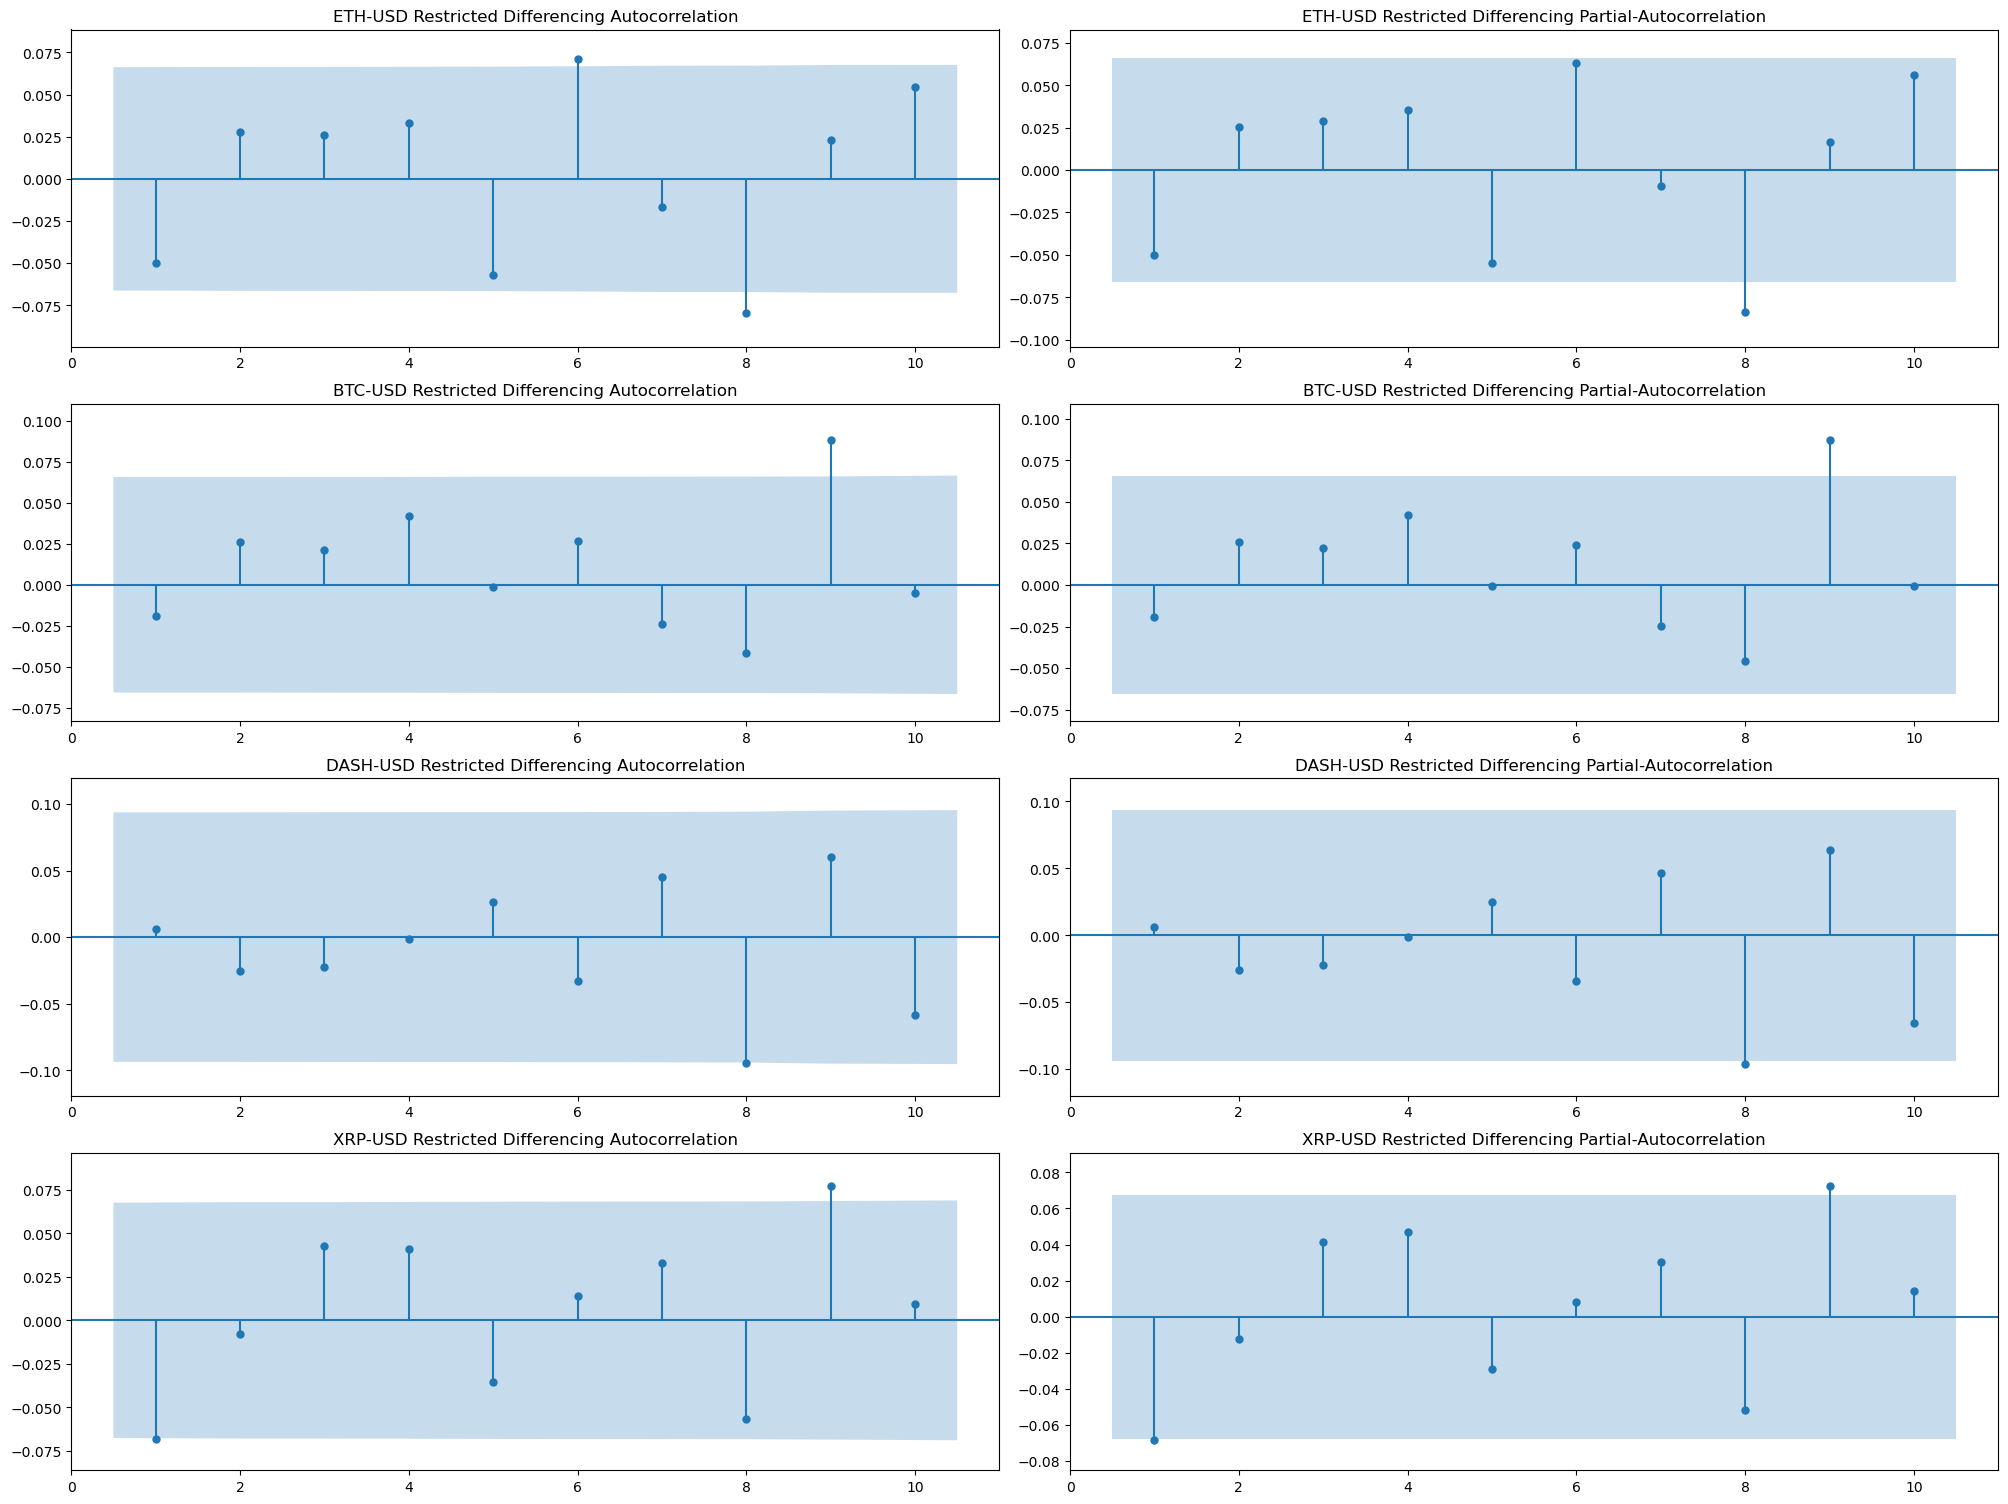

<Figure size 640x480 with 0 Axes>

In [ ]:
correlograms(
    trainCryptoDiffDict,
    "Diff",
    cryptoList,
    titleAuto = "Restricted Differencing Autocorrelation",
    titlePartial = "Restricted Differencing Partial-Autocorrelation", 
    zeroAuto = False, yLimsAuto = True,
    zeroPar = False, yLimsPar = True
)

Osserviamo forte correlazione (effetto clustering) e quindi potremmo procedere a modellarli con dei processi GARCH.

##### 3_1_4. Analisi Normalità
Per l'analisi di normalità eseguiamo i seguenti test:
* Shapiro-Wilk
* Kolmogorov-Smirnov

Nel test di Shapiro-Wilk abbiamo:
* $H_0$: I dati seguono una distribuzione normale
* $H_1$: I dati NON seguono una distribuzione normale

Nel test di Kolmogorov-Smirnov abbiamo:
* $H_0$: I dati seguono la distribuzione specificata
* $H_1$: I dati NON seguono la distribuzione specificata

Nel nostro caso vogliamo:
* Shapiro-Wilk, **Accettare**
* Kolmogorov-Smirnov, **Accettare**

In [ ]:
shapiro_wilk(trainCryptoDiffDict, "Diff", cryptoList)
kolmogorov_smirnov(trainCryptoDiffDict, "Diff", cryptoList)

                            Shapiro-Wilk                            
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.9502420425415039 │ 1.3270286513620812e-16 │ Reject  │
│ BTC-USD  │ 0.9572618007659912 │  1.919576134737323e-15 │ Reject  │
│ DASH-USD │  0.939193844795227 │ 2.2313227654446877e-12 │ Reject  │
│ XRP-USD  │ 0.8953757286071777 │ 1.7658039207309898e-23 │ Reject  │
└──────────┴────────────────────┴────────────────────────┴─────────┘

                          Kolmogorov-Smirnov                          
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                  pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.47223125234355756 │ 1.3485745072511574e-179 │ Reject  │
│ BTC-USD  │  0.4785933494051804 │ 3.9304122976977064e-188 │ Reject  │
│ DASH-USD │  0.4741664051569694 │   9.750037391596386e-91 │ Reject  │
│ XRP-USD  │ 0.46522174716623627 │ 1.8352320088248526e-167 │ Reject  │
└──────────┴─────────────────────┴─────────────────────────┴─────────┘

## 5. Quadratic autocorrelation

Analizziamo l'autocorrelazione dei quadrati: osservando i grafici possiamo infatti notare come a periodi di alta volatilità seguano periodi di alta volatilità e come a periodi di bassa volatilità seguano periodi di bassa volatilità. Questo ci fa supporre la presenza di una autocorrelazione nella serie delle varianze.

Ricordando che:

$D^{2}[X_t] = E[X_t^{2}] + E^{2}[X_t]$

Se la media fosse nulla quindi la varianza dei rendimenti corrisponderebbe con il quadrato dei rendimenti stessi:

$D^{2}[X_t] = E[X_t^{2}]$

In [ ]:
#TODO media nulla -> interessante (indice di mercato efficiente) (BTC prof)
# Ipotesi nulla: la media è zero
null_hypothesis_mean = 0
alpha = 0.05
meanTable = buildTable("Zero Mean Test", ["Crypto", "T-Statistic", "P-Value", "Result"], ["left", "right", "right", "left"])
for crypto in cryptoList:
    # Esegue il test t
    t_statistic, p_value = ttest_1samp(differencingDict[crypto]["Diff"], null_hypothesis_mean)

    # Confronta il p-value con un livello di significatività predefinito (ad esempio, 0.05)
    outcomeString = "Reject" if p_value < alpha else "Accept"
    meanTable.add_row(crypto, str(t_statistic), str(p_value), outcomeString)
# Stampa i risultati del test
console = Console()
console.print(meanTable)

                         Zero Mean Test                          
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Crypto   ┃         T-Statistic ┃             P-Value ┃ Result ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ ETH-USD  │ 0.33808066325759595 │  0.7353367184851297 │ Accept │
│ BTC-USD  │  0.3725821323911949 │  0.7094976528285228 │ Accept │
│ DASH-USD │  -1.459006273766798 │ 0.14471524793122822 │ Accept │
│ XRP-USD  │ -0.5918757465602607 │  0.5539984936921993 │ Accept │
└──────────┴─────────────────────┴─────────────────────┴────────┘

Per nessuno degli strumenti finanziari possiamo rigettare l'ipotesi nulla di *media nulla* al 95%.

Procediamo quindi con l'analisi dei rendimenti logaritmici quadrati.
Analizziamo l'eventuale presenza di autocorrelazione con il test di *Ljung-Box*.

In [ ]:
ljung_box_test(trainCryptoDiffDict, "QuadDiff", cryptoList)

                             Ljung-Box                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 107.45662340504884 │ 1.7362744278257656e-18 │ Reject  │
│ BTC-USD  │ 28.435878927917237 │  0.0015366636984585028 │ Reject  │
│ DASH-USD │ 20.296369471575147 │   0.026570915198950266 │ Reject  │
│ XRP-USD  │ 124.35893071112875 │  6.585066550321394e-22 │ Reject  │
└──────────┴────────────────────┴────────────────────────┴─────────┘

Dai risultati si evince che per tutte le monete si può rigettare l'ipotesi nulla di *non-autocorrelazione*, concludiamo quindi che tutte le monete presentano autocorrelazione.

Procediamo a graficare quindi gli autocorrelogrammi per le varie monete.

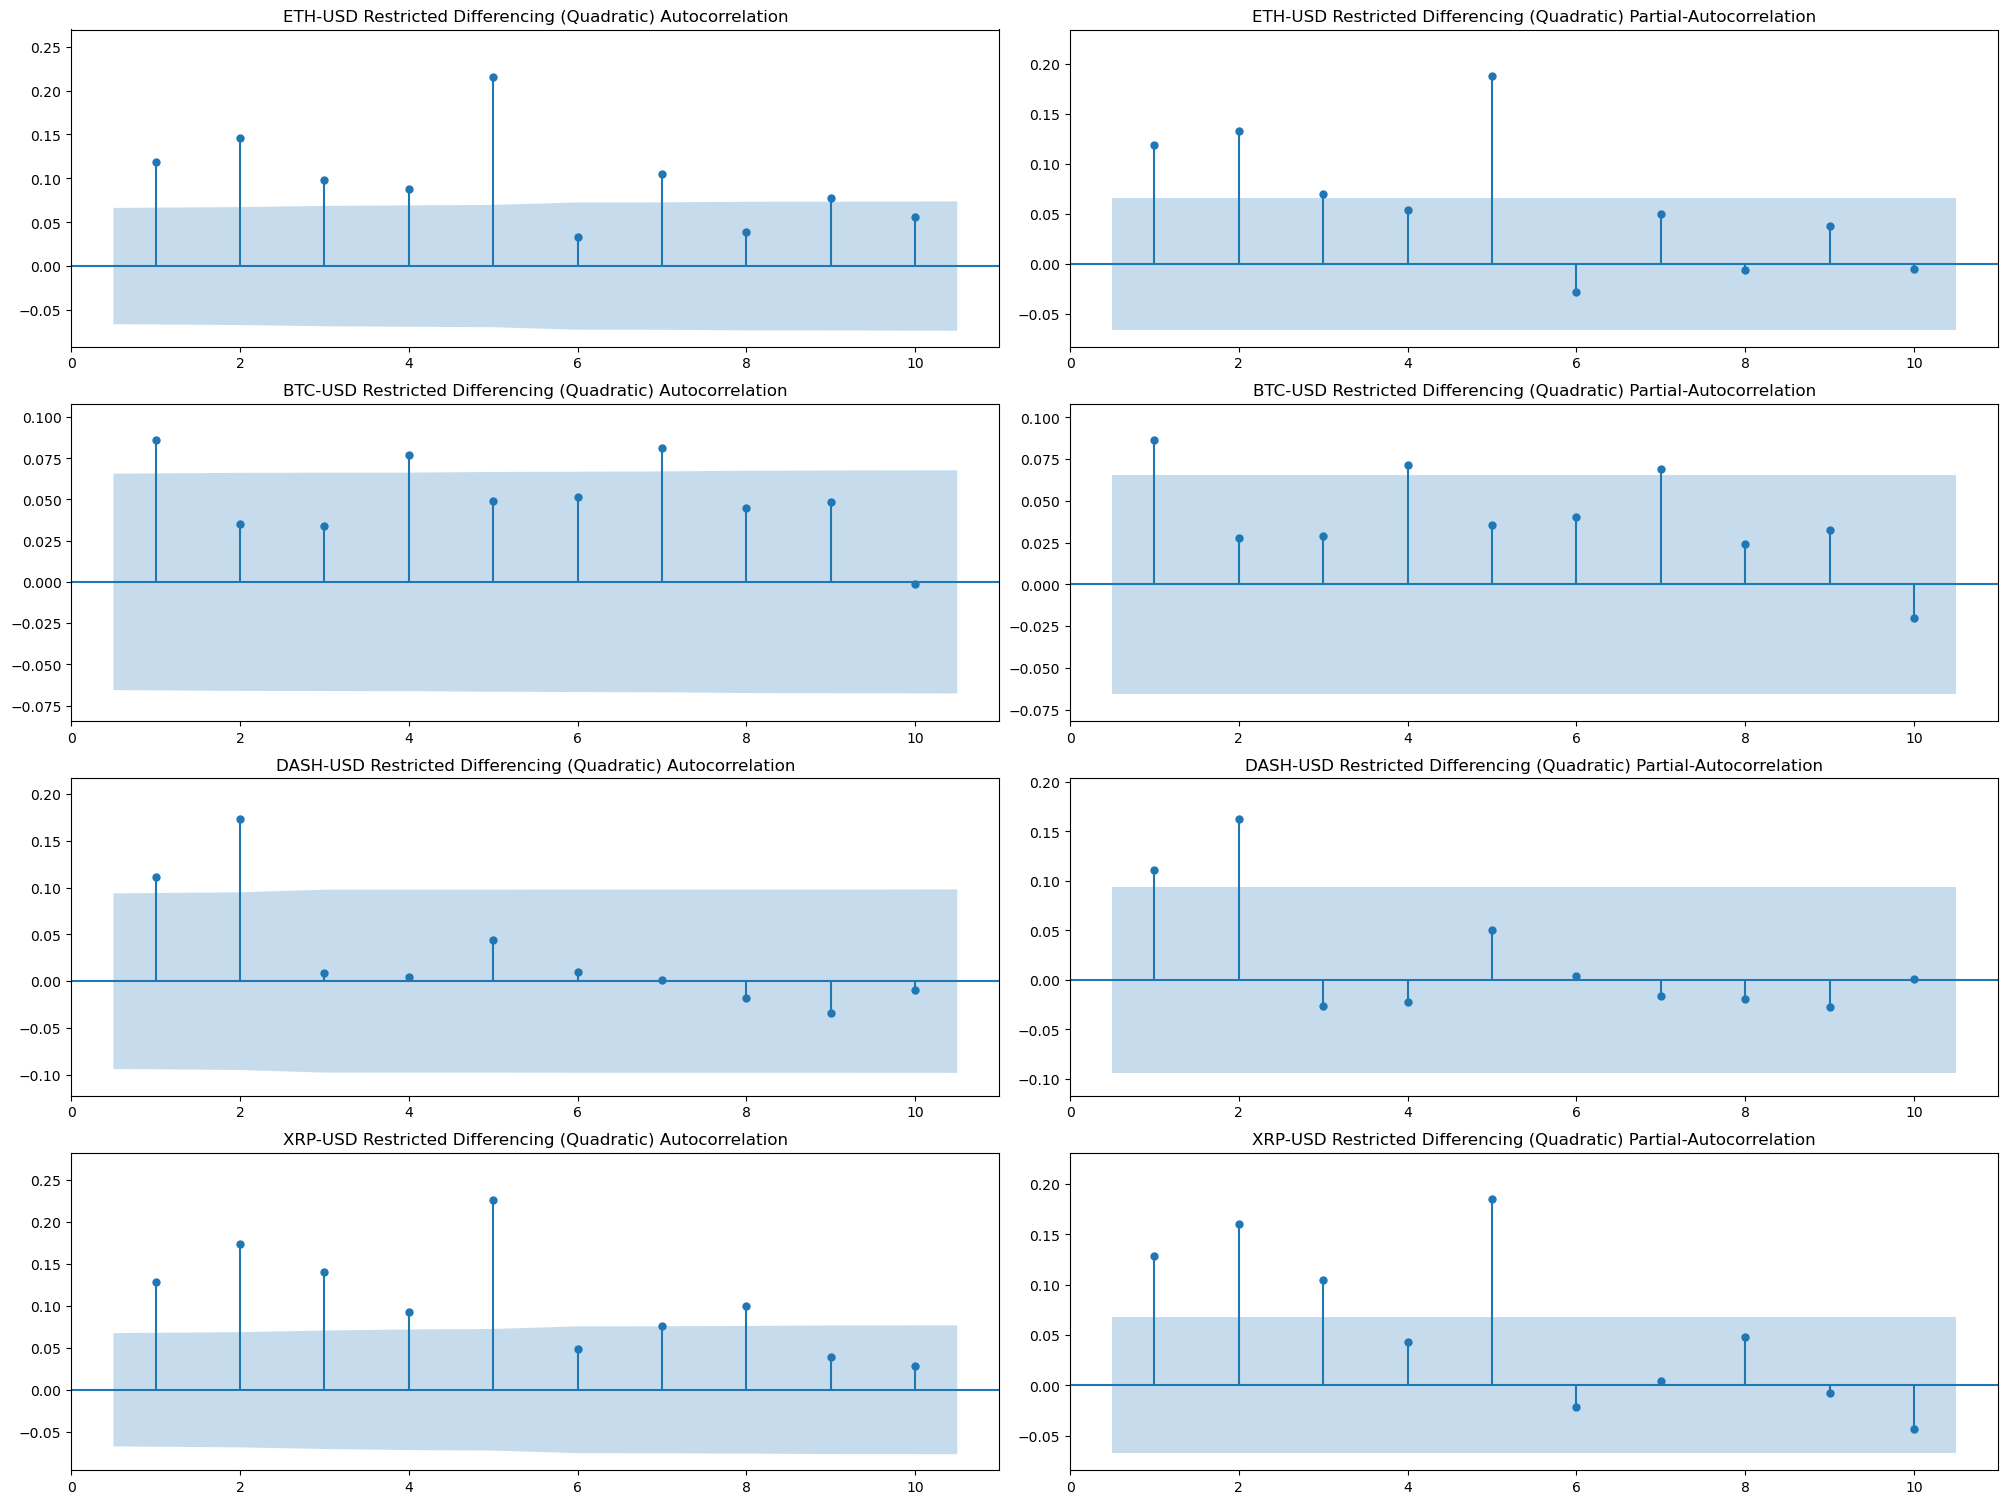

<Figure size 640x480 with 0 Axes>

In [ ]:
correlograms(
    trainCryptoDiffDict, 
    "QuadDiff", 
    cryptoList,
    titleAuto = "Restricted Differencing (Quadratic) Autocorrelation",
    titlePartial = "Restricted Differencing (Quadratic) Partial-Autocorrelation",
    zeroAuto = False, zeroPar = False,
    yLimsAuto = True, yLimsPar = True
)

## 6. Analisi con modello GARCH

Essendo presente autocorrelazione nella volatilità dei rendimenti possiamo procedere a modellarla tramite un *Generalized ARCH model (GARCH)*.

Nel modello GARCH ...In practice, only rather rich ARCH parameterizations are able to ﬁt ﬁnancial series adequately
However, largely parameterized models can be unstable in forecasting and a hard to estimate
In order to overcome the shortcomings of the ARCH, Tim Bollerslev proposed a generalisation of the ARCH model called GARCH (Bollerslev, 1986)
The model allows to ﬁt ﬁnancial returns adequately while keeping the number of parameters small
In practice, the GARCH model is one of the most successfully employed volatility models

(da pag 63 a 110 circa)

In [ ]:
residualsDict : {str, pd.DataFrame} = {}

r['source']('./R/R_Scripts.R')
garchResiduals_R = robjects.globalenv['garchResiduals']

for crypto in cryptoList :
    tempCryptoDiff = trainCryptoDiffDict[crypto]["Diff"].copy()
    #tempCryptoDiff = differencingDict[crypto]["Diff"].copy()
    model = arch_model(tempCryptoDiff)
    fittedModel = model.fit(disp='off')  # Setting disp to 'off' to suppress convergence messages
    console.print(crypto + "\n" + str(fittedModel.summary()))

    diffList_R = pandas2ri.py2rpy(tempCryptoDiff)
    residuals_R = garchResiduals_R(diffList_R)
    residuals = pd.Series(list(residuals_R)[1 : ]).dropna()

    diff = residuals - fittedModel.resid

    residualsDict[crypto] = pd.DataFrame(data = {"Resid" : residuals})

ETH-USD
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2214.67
Distribution:                  Normal   AIC:                          -4421.35
Method:            Maximum Likelihood   BIC:                          -4402.25
                                        No. Observations:                  875
Date:                Tue, Dec 12 2023   Df Residuals:                      874
Time:                        13:04:32   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.1548e-04  5.980e-04      0.862      0.389 [-6.566e-04,1.688e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.7622e-06  3.227e-11  2.715e+05      0.000 [8.762e-06,8.762e-06]
alpha[1]       0.0999  3.855e-02      2.592  9.552e-03   [2.435e-02,  0.175]
beta[1]        0.8801  3.175e-02     27.722 3.824e-169     [  0.818,  0.942]
============================================================================

Covariance estimator: robust


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     3.927254e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -2.964e+03
     1    7 -2.964e+03  1.76e-04  2.76e-04  1.6e-04  3.4e+09  1.6e-05  4.66e+05
     2    8 -2.965e+03  1.17e-05  1.29e-05  1.4e-04  2.0e+00  1.6e-05  1.27e+00
     3   15 -2.967e+03  8.08e-04  1.17e-03  2.8e-01  2.0e+00  4.0e-02  1.26e+00
     4   18 -2.975e+03  2.58e-03  7.88e-03  8.4e-01  1.9e+00  6.4e-01  2.74e-01
     5   30 -2.999e+03  8.07e-03  5.29e-02  3.9e-05  4.0e+00  5.4e-05  9.59e-02
     6   36 -3.005e+03  1.98e-03  1.48e-03  9.8e-03  1.8e+00  1.4e-02  1.33e-02
     7   37 -3.005e+03  1.83e-04  2.71e-03  9.9e-03  1.9e+00  1.4e-02  1.23e-02
     8   38 -3.010e+03  1.40e-03  2.52e-03  4.7e-03  1.9e+00  6.8e-03  2.72e-03
     9   41 -3.012e+03  6.81e-04  8.80e-04  5.4e-02 

BTC-USD
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2457.09
Distribution:                  Normal   AIC:                          -4906.17
Method:            Maximum Likelihood   BIC:                          -4887.00
                                        No. Observations:                  891
Date:                Tue, Dec 12 2023   Df Residuals:                      890
Time:                        13:04:32   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.5056e-04  4.904e-04      0.307      0.759 [-8.106e-04,1.112e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.2742e-06  1.534e-13  3.437e+07      0.000 [5.274e-06,5.274e-06]
alpha[1]       0.0500  8.641e-04     57.854      0.000 [4.830e-02,5.169e-02]
beta[1]        0.9298  5.429e-03    171.285      0.000     [  0.919,  0.940]
============================================================================

Covariance estimator: robust


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     2.265060e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -3.251e+03
     1    8 -3.251e+03  2.80e-05  5.41e-05  4.7e-05  8.0e+09  4.7e-06  2.16e+05
     2   16 -3.253e+03  3.53e-04  6.39e-04  2.9e-01  2.0e+00  4.1e-02  4.05e-01
     3   20 -3.263e+03  3.10e-03  9.22e-04  8.6e-01  6.0e-01  6.5e-01  3.78e-03
     4   28 -3.264e+03  3.85e-04  8.48e-04  3.7e-06  1.4e+01  5.2e-06  2.26e+00
     5   29 -3.264e+03  2.18e-06  1.92e-06  3.7e-06  2.0e+00  5.2e-06  4.51e+00
     6   30 -3.264e+03  1.28e-07  1.32e-07  3.7e-06  2.0e+00  5.2e-06  4.63e+00
     7   39 -3.269e+03  1.55e-03  1.37e-03  5.7e-02  2.0e+00  8.5e-02  4.62e+00
     8   41 -3.270e+03  3.03e-04  3.27e-04  1.1e-02  2.0e+00  1.7e-02  5.85e+01
     9   42 -3.271e+03  1.87e-04  3.03e-04  1.1e-02 

DASH-USD
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1111.64
Distribution:                  Normal   AIC:                          -2215.28
Method:            Maximum Likelihood   BIC:                          -2198.96
                                        No. Observations:                  437
Date:                Tue, Dec 12 2023   Df Residuals:                      436
Time:                        13:04:32   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.4232e-04  8.411e-04     -0.764      0.445 [-2.291e-03,1.006e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.7952e-05  1.155e-05      5.017  5.237e-07 [3.531e-05,8.059e-05]
alpha[1]       0.1076  6.875e-02      1.565      0.117  [-2.712e-02,  0.242]
beta[1]        0.7379  7.224e-02     10.215  1.697e-24     [  0.596,  0.880]
============================================================================

Covariance estimator: robust


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     3.508099e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -1.499e+03
     1    7 -1.499e+03  7.94e-05  1.32e-04  1.0e-04  2.0e+09  1.0e-05  1.30e+05
     2    8 -1.499e+03  3.23e-06  3.54e-06  9.5e-05  2.0e+00  1.0e-05  8.66e-01
     3   15 -1.501e+03  9.78e-04  1.39e-03  2.9e-01  2.0e+00  4.1e-02  8.63e-01
     4   18 -1.505e+03  2.42e-03  2.42e-03  5.8e-01  1.9e+00  1.6e-01  2.04e-01
     5   19 -1.508e+03  2.14e-03  4.26e-03  4.2e-01  1.3e+00  3.3e-01  1.58e-02
     6   27 -1.508e+03  3.83e-04  8.03e-04  1.1e-05  5.3e+00  1.2e-05  2.13e-03
     7   28 -1.508e+03  3.48e-06  2.55e-06  9.5e-06  2.0e+00  1.2e-05  1.44e-04
     8   35 -1.508e+03  8.90e-05  1.11e-04  2.3e-02  5.2e-01  2.8e-02  1.34e-04
     9   37 -1.509e+03  1.68e-04  1.04e-04  2.8e-02 

XRP-USD
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2047.80
Distribution:                  Normal   AIC:                          -4087.60
Method:            Maximum Likelihood   BIC:                          -4068.65
                                        No. Observations:                  842
Date:                Tue, Dec 12 2023   Df Residuals:                      841
Time:                        13:04:32   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.6731e-04  6.177e-04     -0.757      0.449 [-1.678e-03,7.433e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.5062e-05  1.386e-11  1.087e+06      0.000 [1.506e-05,1.506e-05]
alpha[1]       0.1002  4.460e-02      2.247  2.463e-02   [1.281e-02,  0.188]
beta[1]        0.8785  3.225e-02     27.244 1.942e-163     [  0.815,  0.942]
============================================================================

Covariance estimator: robust


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     5.269160e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -2.727e+03
     1    7 -2.728e+03  2.94e-04  4.98e-04  3.0e-04  1.5e+09  3.0e-05  3.84e+05
     2    8 -2.728e+03  8.05e-06  8.84e-06  2.9e-04  2.0e+00  3.0e-05  1.09e+01
     3   15 -2.747e+03  7.08e-03  1.08e-02  5.5e-01  2.0e+00  1.2e-01  1.07e+01
     4   17 -2.763e+03  5.63e-03  5.08e-03  3.0e-01  2.0e+00  1.2e-01  2.49e+00
     5   19 -2.795e+03  1.15e-02  1.13e-02  3.9e-01  2.0e+00  2.4e-01  2.86e+02
     6   21 -2.801e+03  2.26e-03  2.28e-03  5.3e-02  2.0e+00  4.9e-02  5.25e+01
     7   23 -2.817e+03  5.47e-03  9.00e-03  1.8e-01  2.0e+00  2.2e-01  7.28e-01
     8   30 -2.818e+03  3.64e-04  8.98e-04  5.8e-06  1.4e+01  7.7e-06  3.52e-02
     9   31 -2.818e+03  8.77e-06  7.09e-06  5.4e-06 

Per valutare la bontà del modello procediamo con un analisi sui residui. <br>

Valutiamo:
 1. Stazionarietà
 2. Autocorrelazione
 3. Eteroschedasticità

In [4]:
# STAZIONARIETÀ
kpss_test(residualsDict, "Resid", cryptoList)
adf_test(residualsDict, "Resid", cryptoList)

# AUTOCORRELAZIONE
ljung_box_test(residualsDict, "Resid", cryptoList)

# ETEROSCHEDASTICITÀ
breusch_pagan_test(residualsDict, "Resid", cryptoList)
white_test(residualsDict, "Resid", cryptoList)

NameError: name 'kpss_test' is not defined

Grafichiamo quindi i residui ottenuti.

<Figure size 1600x900 with 0 Axes>

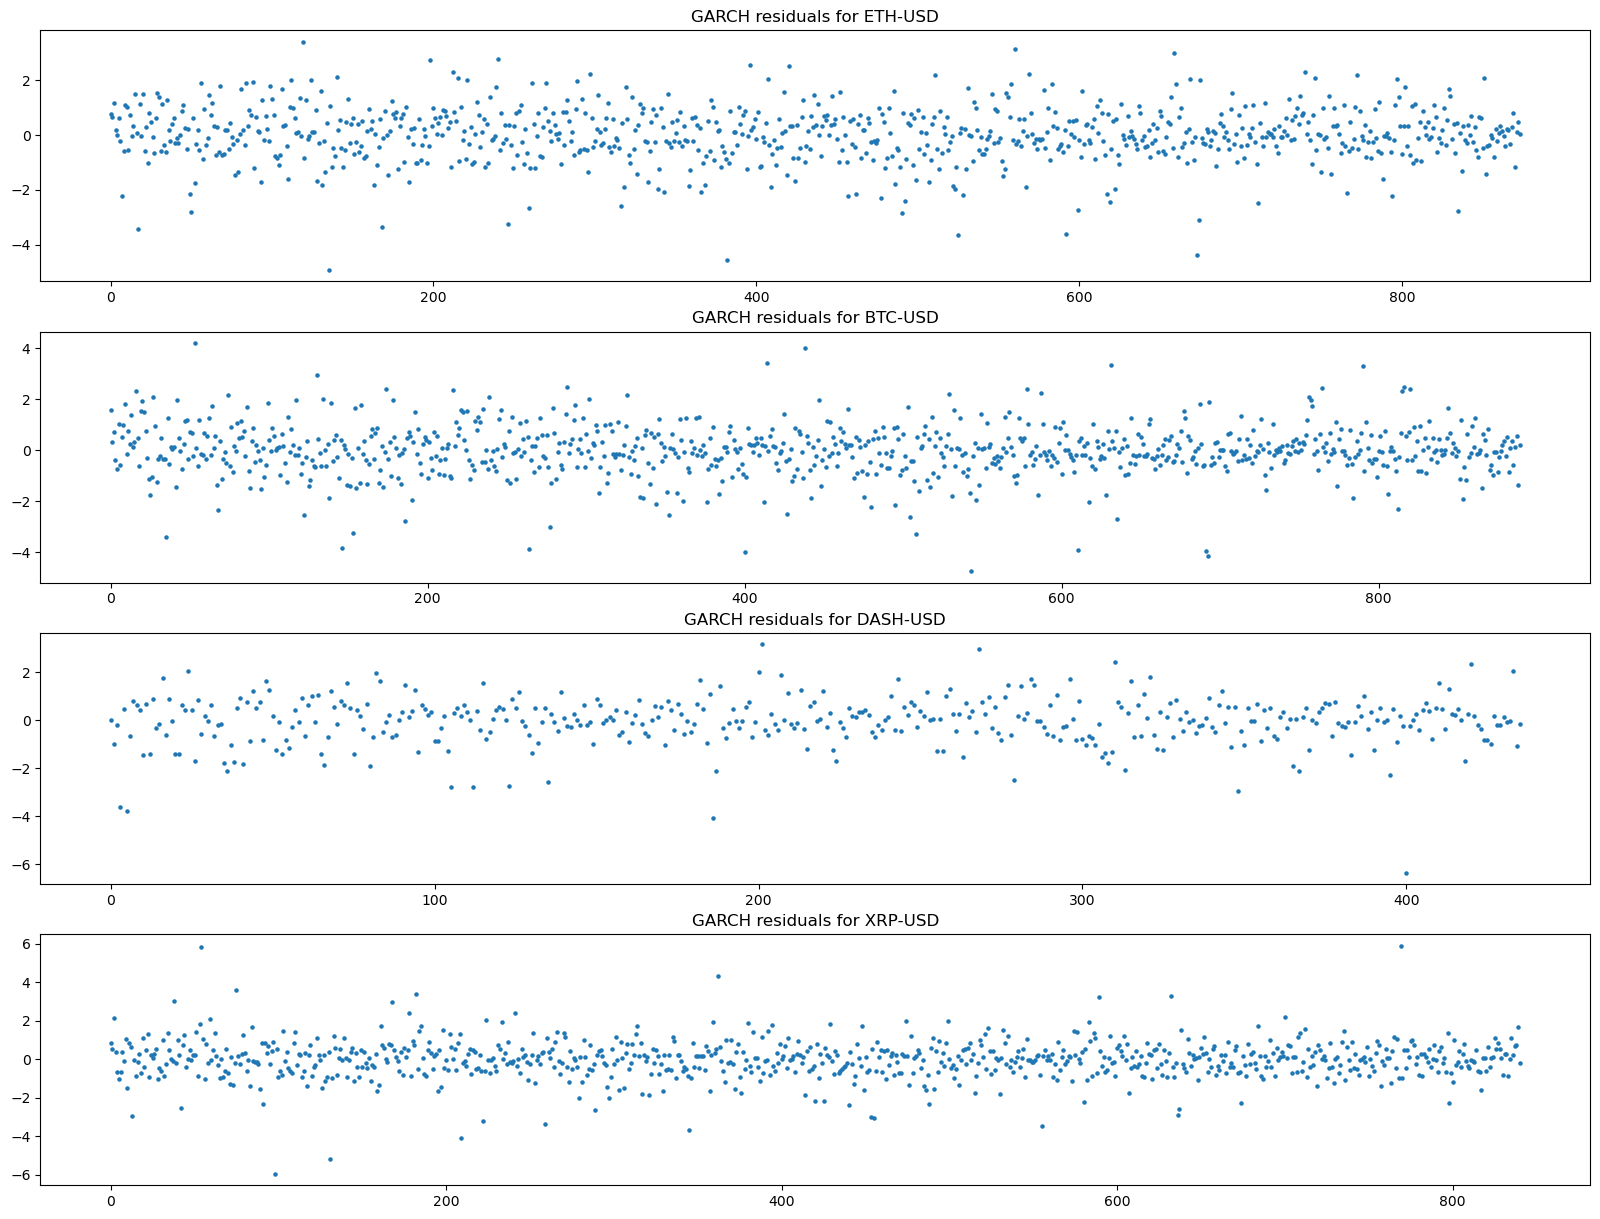

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize= (16,9))
fig, axs = plt.subplots(nrows=len(cryptoList), figsize=(20, 15))
i = 0
for crypto in cryptoList:
    axs[i].scatter(x = np.arange(0, residualsDict[crypto].shape[0]), y = residualsDict[crypto]["Resid"], sizes = [5])
    axs[i].set_title("GARCH residuals for " + crypto)
    i += 1


plt.show()
plt.clf()

Per quanto riguarda l'autocorrelazione andiamo a produrre degli autocorrelogrammi.

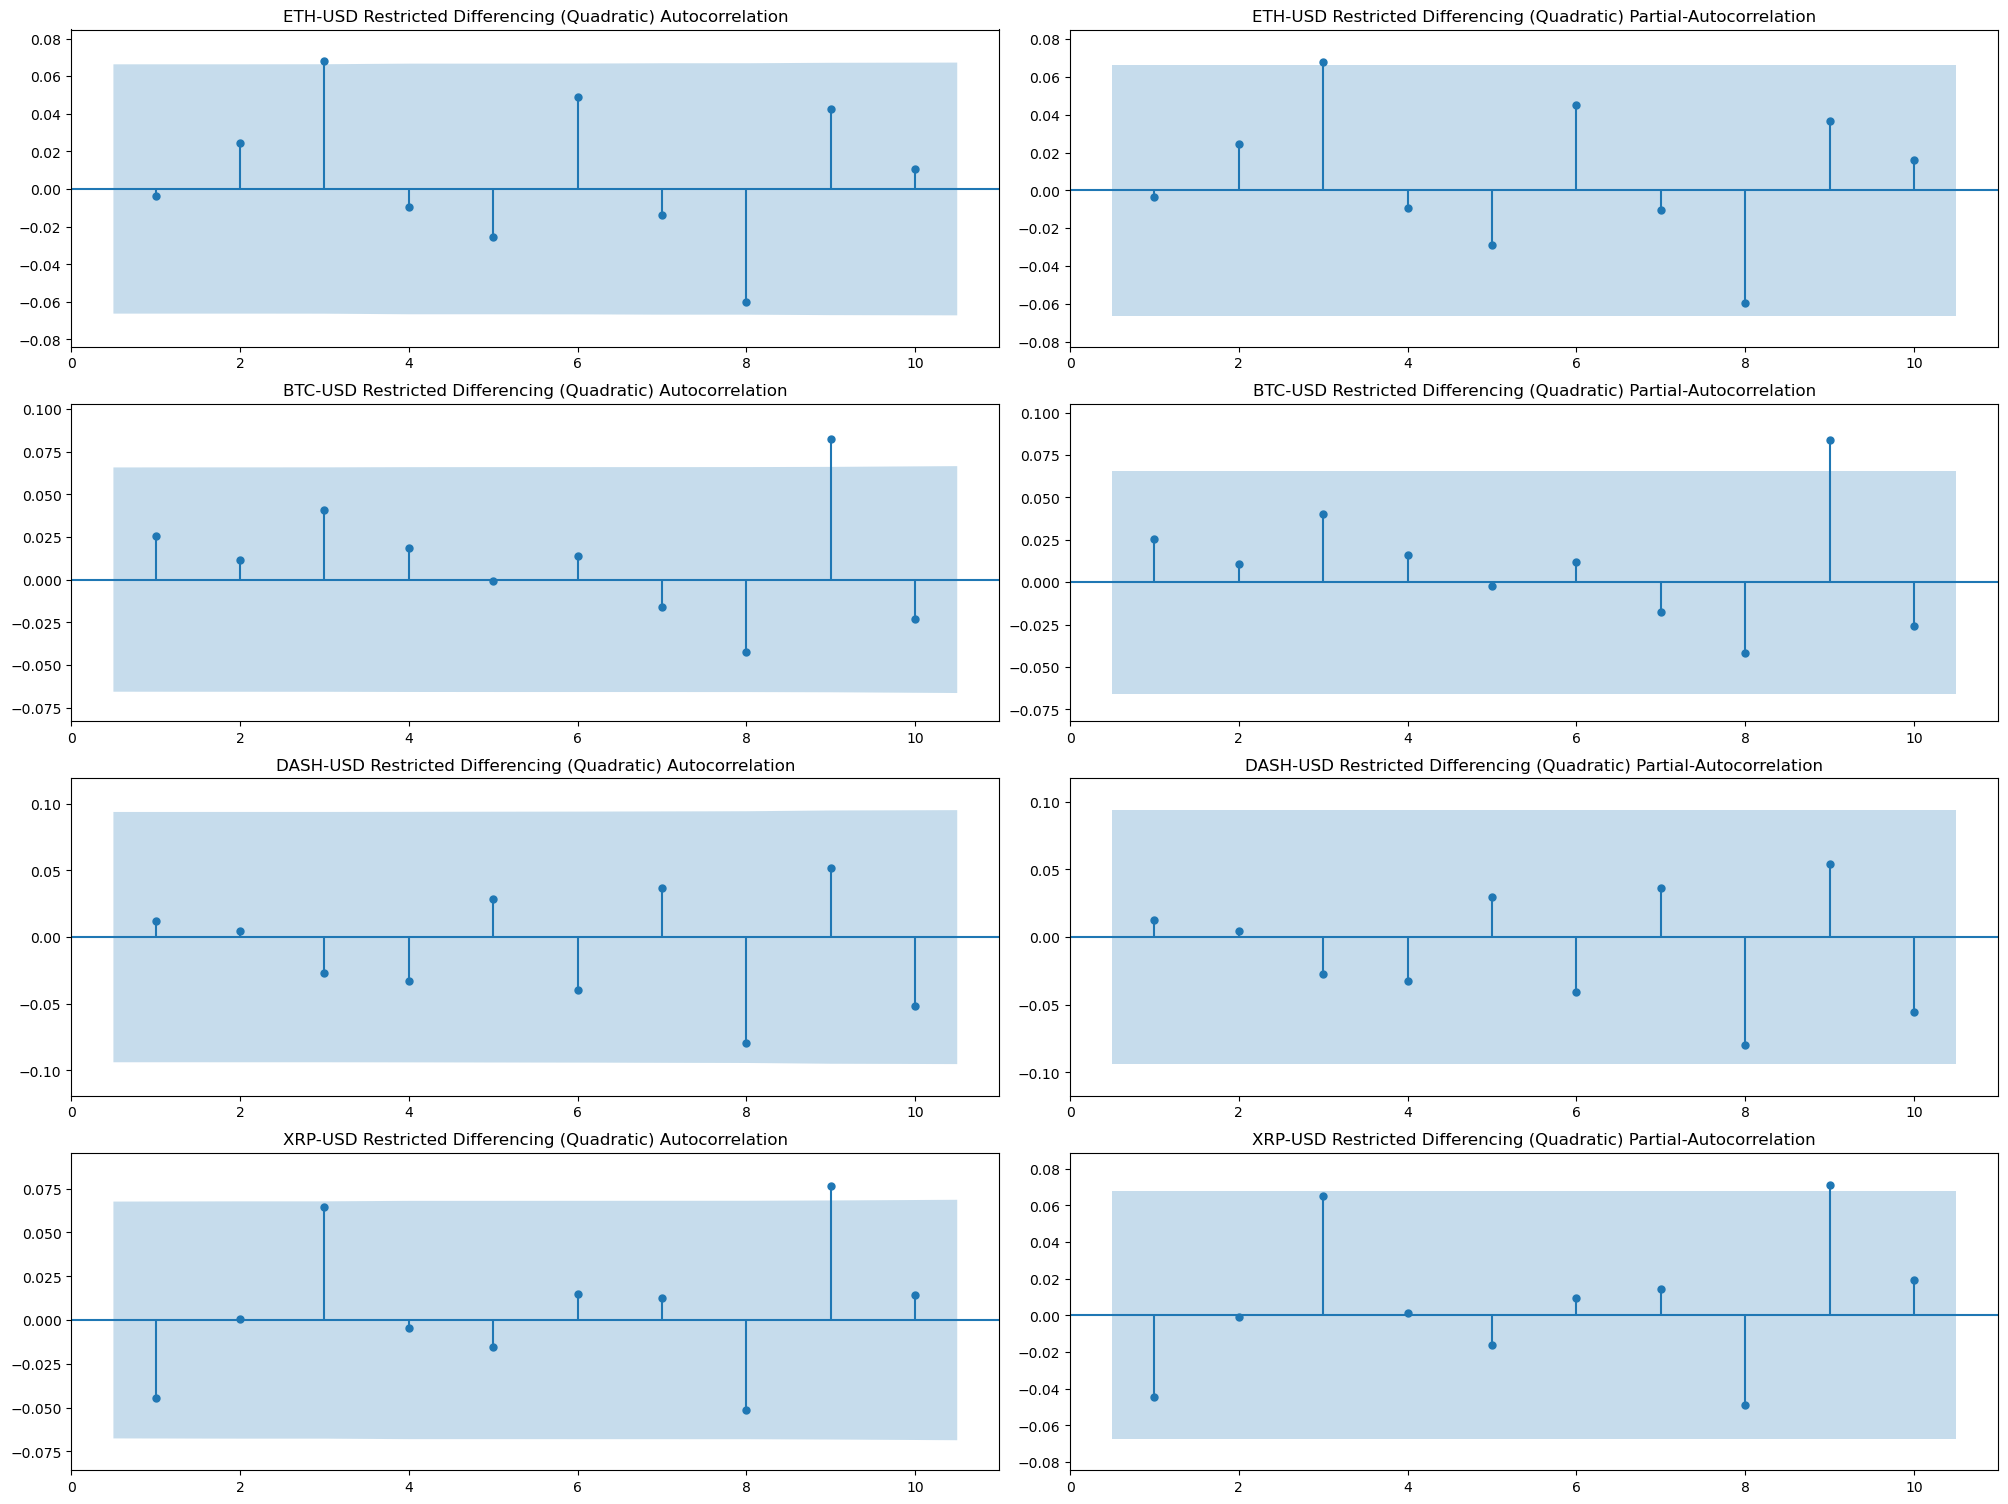

<Figure size 640x480 with 0 Axes>

In [ ]:
correlograms(
    residualsDict, 
    "Resid", 
    cryptoList,
    titleAuto = "Restricted Differencing (Quadratic) Autocorrelation",
    titlePartial = "Restricted Differencing (Quadratic) Partial-Autocorrelation",
    zeroAuto = False, zeroPar = False,
    yLimsAuto = True, yLimsPar = True
)

### 6.1. Tecnica di Bootstrap sui residui del modello GARCH

Con l'obiettivo di generare delle bande di predizione in cui ci aspettiamo che ricada il nostro testing set andiamo ad applicare la tecnica di *Bootstrap*.
Questa tecnica, che sembra empiricamente funzionare discretamente bene, è molto facile e veloce rispetto ad un tradizionale approccio parametrico ma non dà informazioni complete sul processo generatore della serie dei residui.

Procediamo quindi con i seguenti passi per ogni cryptovaluta:
 1. Fit del modello *GARCH(1,1)* sul testingSet dei rendimenti
 2. Estrazione dei parametri del modello ($\alpha_0$, $\alpha_1$, $\beta_1$)
 3. Tecnica di Bootstrap:
    - Estrazione di *TESTING_SET_LEN* samples con rimpiazzamento dai residui del modello
    - Generazione di *10000 traiettorie*:
      <br> $\sigma^2_t = \alpha_0 + \alpha_1 X_{t-1}^2 + \beta_1 \sigma_{t-1}^2$
      <br> $X_t = \sigma_t W_t$
      <br> $\forall t = 1,...,testSetLen$
      <br> Dove $\sigma_0, X_0 = lastTrainingSetPoint$
  

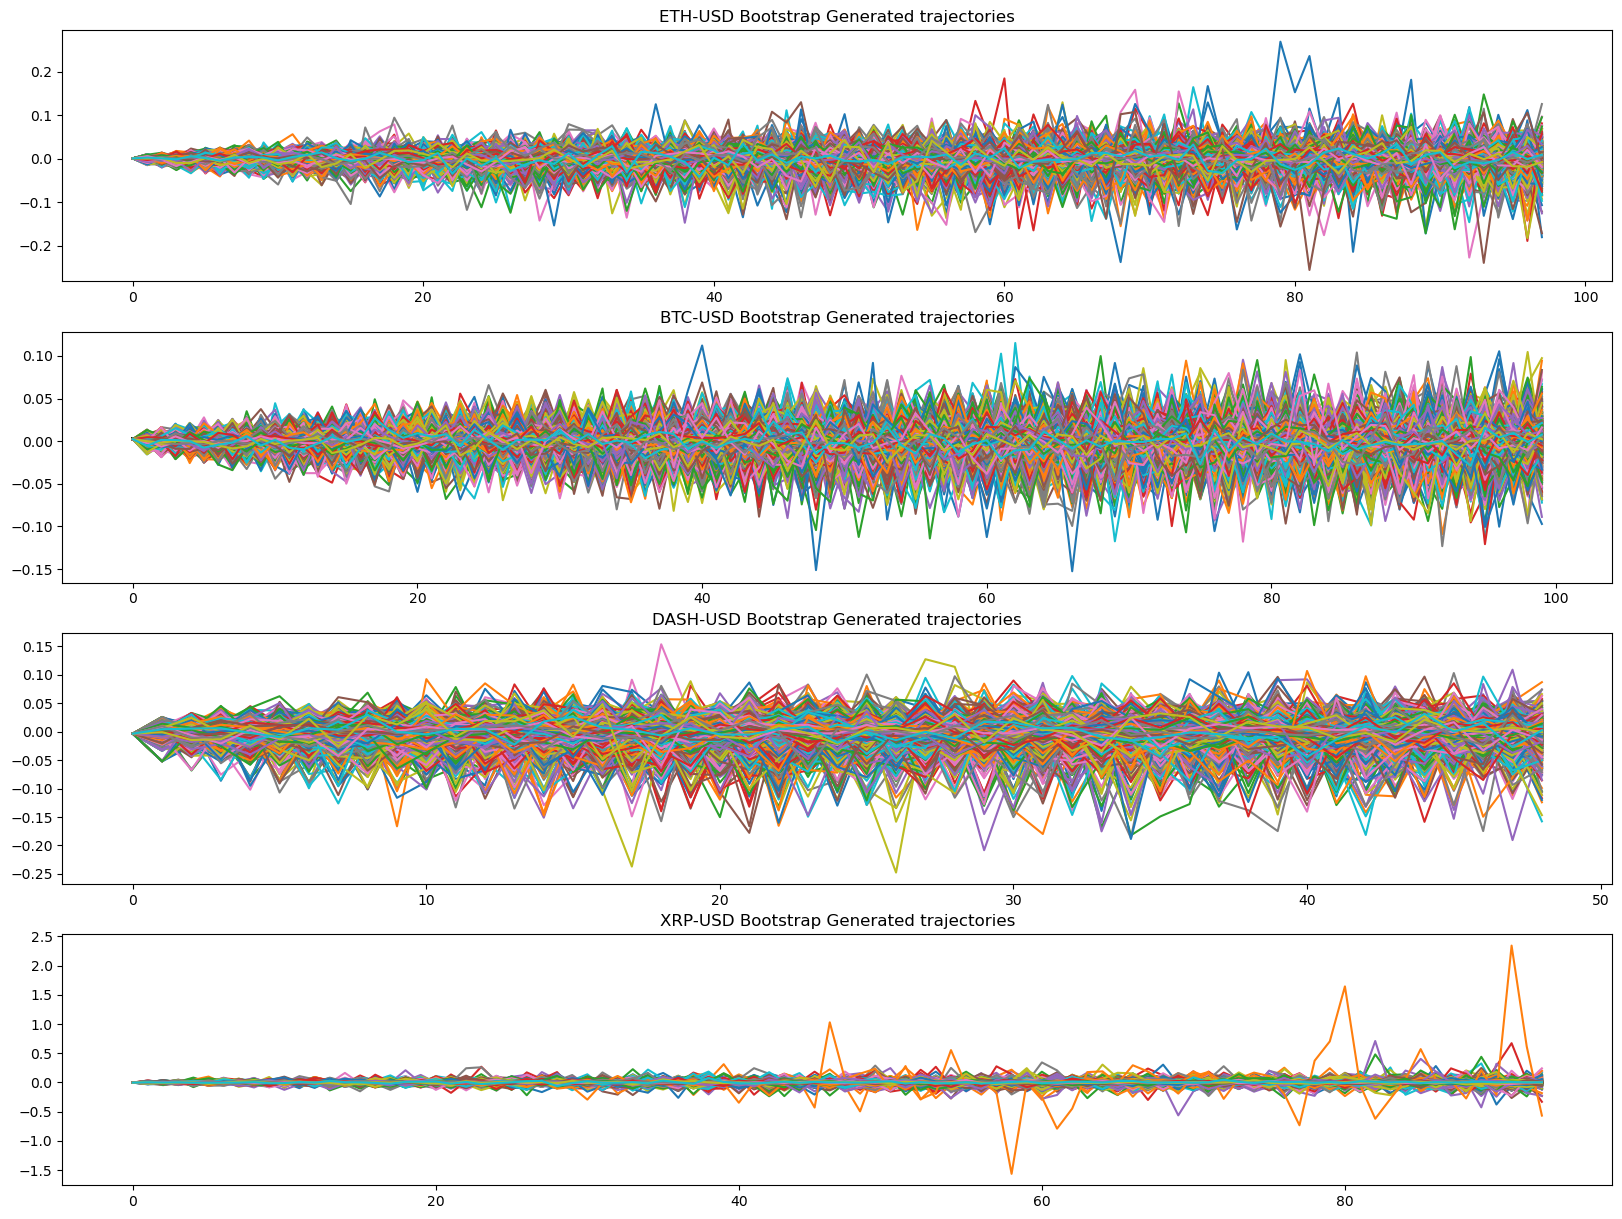

<Figure size 640x480 with 0 Axes>

In [ ]:
NUM_SAMPLES = 10000
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
np.random.seed(NP_RANDOM_SEED)
trajectoriesDict : dict[str, list[list]] = {}

r['source']('./R/R_Scripts.R')
garchResiduals_R = robjects.globalenv['garchResiduals']

for crypto in cryptoList :
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto]["Diff"].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto]["Diff"].shape[0]
    garchModel = arch_model(trainCryptoDiffDict[crypto]["Diff"])
    fittedModel = garchModel.fit(disp = 'off')
    residuals = residualsDict[crypto]["Resid"]

    alpha_0 = fittedModel.params["omega"]
    alpha_1 = fittedModel.params["alpha[1]"]
    beta_1 = fittedModel.params["beta[1]"]

    sigma_0 = trainCryptoDiffDict[crypto]["Diff"][TRAINING_SET_LEN - 1]
    trajectories = []
    for _ in range(NUM_SAMPLES):
        computedXt = []
        bootstrapSample = np.random.choice(a = residuals, size = TESTING_SET_LEN, replace = True)
        prev_Xt = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN-1]
        computedXt.append(prev_Xt)
        prev_var_t = sigma_0**2
        for i in range(TESTING_SET_LEN):
            var_t = alpha_0 + (alpha_1 * (prev_Xt**2)) + (beta_1 * prev_var_t)
            Xt = np.sqrt(var_t) * bootstrapSample[i]
            computedXt.append(Xt)
            prev_Xt = Xt
            prev_var_t = var_t
        trajectories.append(computedXt)
    trajectoriesDict[crypto] = trajectories

    axs[axsIndex].set_title(crypto + " Bootstrap Generated trajectories")
    for traj in trajectories:
        axs[axsIndex].plot(traj)
    axsIndex += 1

plt.show()
plt.clf()

Partendo dalle traiettorie generate, andiamo a calcolare i quantili empirici per ogni t e costruiamo le nostre bande di predizione al 25% e 75%.

Grafichiamo poi il tutto sui dati di testing effettivi.

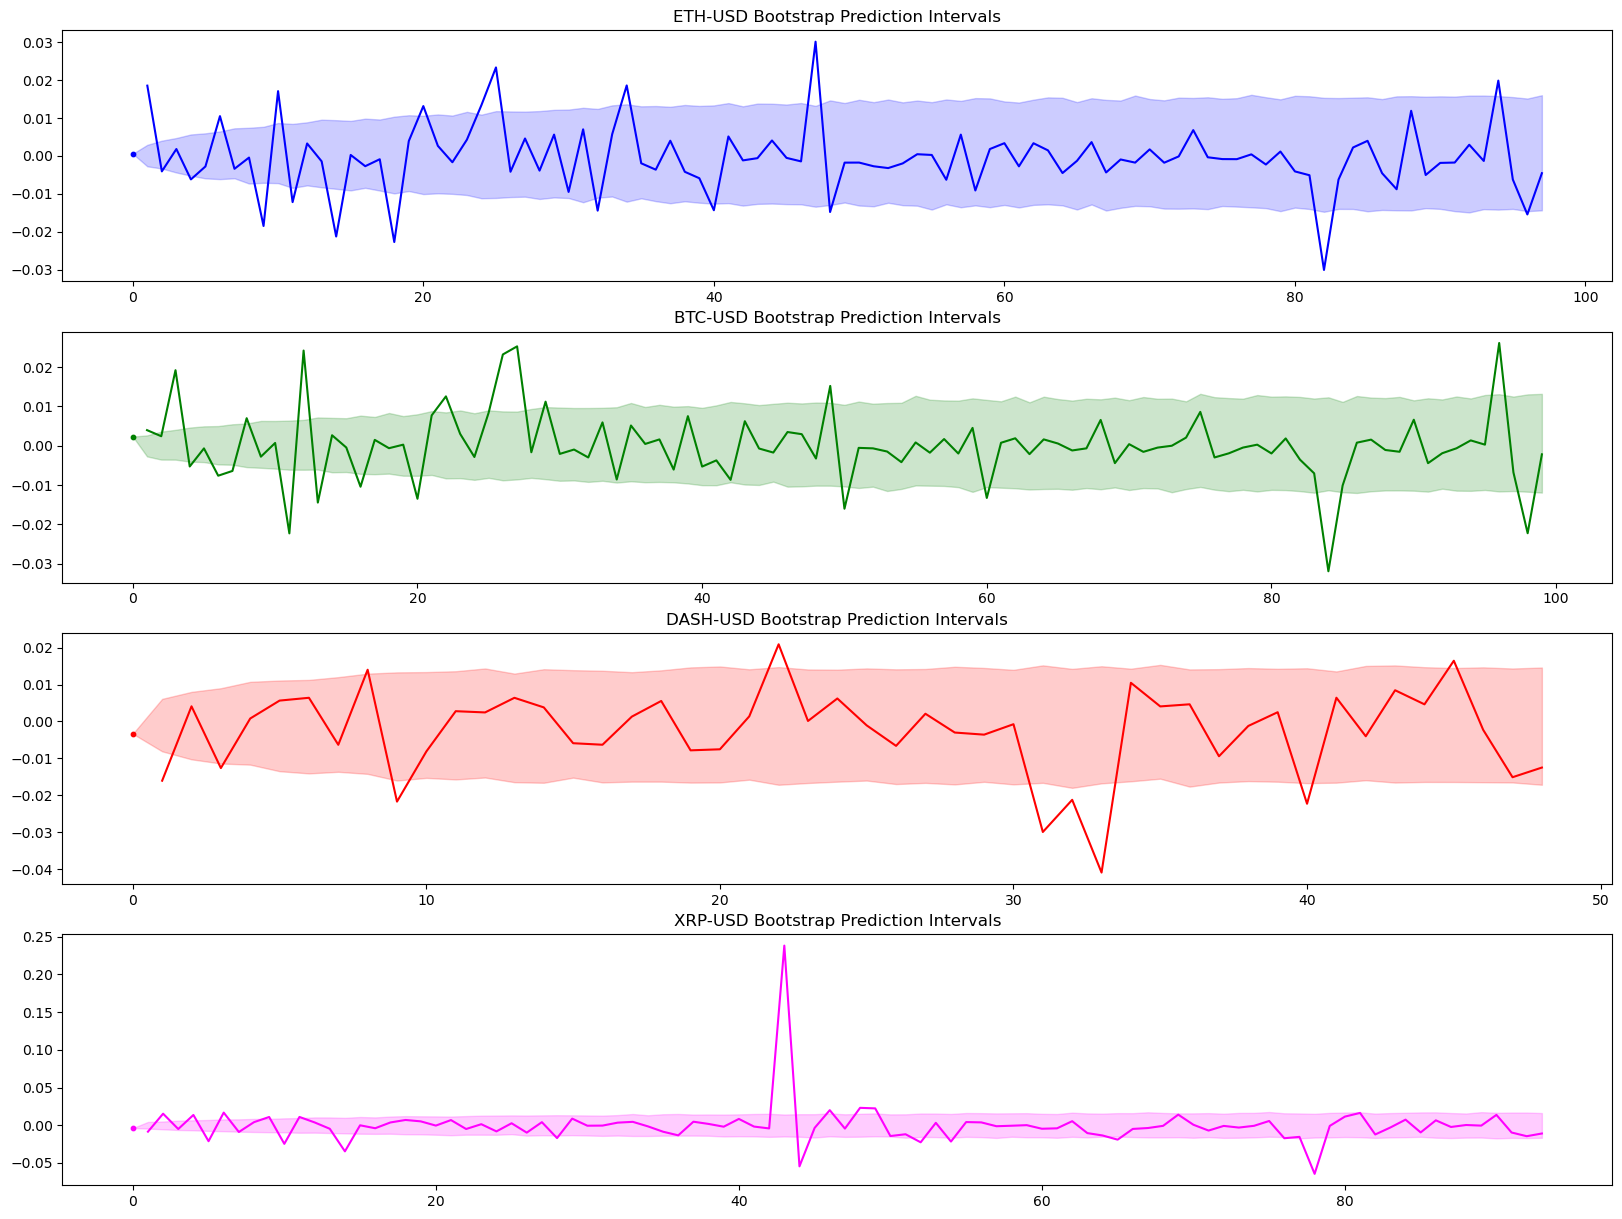

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
trajQuantDict : dict[str,tuple[list,list]] = {}

for crypto in cryptoList:
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    
    trajectories = trajectoriesDict[crypto]
    trajectories = np.array(trajectories)
    trajectories = trajectories.T
    trajQuantList_25 = []
    trajQuantList_75 = []
    for i in range(trajectories.shape[0]):
        trajQuant_25 = np.quantile(a = trajectories[i], q = 0.25)
        trajQuant_75 = np.quantile(a = trajectories[i], q = 0.75)
        trajQuantList_25.append(trajQuant_25)
        trajQuantList_75.append(trajQuant_75)
    trajQuantDict[crypto] = (trajQuantList_25,trajQuantList_75)

    firstPoint = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN - 1]
    axs[axsIndex].plot(np.arange(1, TESTING_SET_LEN + 1, 1), testCryptoDiffDict[crypto]["Diff"], color = colors[axsIndex])
    axs[axsIndex].scatter(x = 0, y = firstPoint, color = colors[axsIndex], sizes = [10])
    axs[axsIndex].fill_between(x = np.arange(0, len(trajQuantList_25), 1), y1 = trajQuantList_25, y2 = trajQuantList_75, alpha = 0.20, color = colors[axsIndex])
    axs[axsIndex].set_title(crypto + " Bootstrap Prediction Intervals")

    axsIndex += 1

plt.show()
plt.clf()

    